## import package

In [ ]:
# import package
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, LSTM, Dense, Dropout, LeakyReLU
from tensorflow.python.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import datetime
import inspect
from tensorflow.keras.layers import ELU

## train, valid 데이터 불러오기

In [40]:
# 데이터 불러오기
train_raw_df = pd.read_csv('e:/kma/data/TRAIN_nottree_with_파생변수0802.csv', encoding='utf8')
train_raw_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
col_list = train_raw_df.columns

test_raw_df = pd.read_csv('e:/kma/data/TEST_with_파생변수0802.csv', encoding='utf8')
test_raw_df = test_raw_df[col_list]


full_raw_df = pd.concat([train_raw_df, test_raw_df], ignore_index=True)
full_raw_df = full_raw_df.astype({'yyyymmdd':'str'})
full_raw_df['yyyymmdd'] = pd.to_datetime(full_raw_df['yyyymmdd'])
full_raw_df


add_list = set(full_raw_df['add'])
indep_cols = full_raw_df.columns.difference(['yyyymmdd', 'add', 'sex', 'frequency'])

In [ ]:
full_raw_df['frequency']

In [ ]:
sido = '서울'
sex = 1
condition = (full_raw_df['add']==sido) & (full_raw_df['sex']==sex)        
tmp = full_raw_df.copy()[condition]


import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="frequency", data=tmp)

frq_size = tmp.groupby(['frequency']).size()
frq_ratio = frq_size/frq_size.sum()
frq_ratio

## def

In [ ]:
# 그래프 타이틀 한글인코딩
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


# 그래프 확인
def graph(actual, pred, model_nm, val_or_test='val'):
    if val_or_test=='val':
        x_var = tmp[-731:-366].yyyymmdd
    elif val_or_test=='test':
        x_var = tmp[-366:].yyyymmdd
    else:
        print('error')
                    
    plt.figure(figsize=(12, 6))
    plt.xlim([min(x_var), max(x_var)])
    # plt.yticks([i for i in range(0, 14)])
    plt.plot(x_var, actual, color="dodgerblue", marker='o', markersize=1.5, label='actual', linewidth=0.3)
    if np.array_equal(actual, pred):
        print(' ')
    else:
        plt.plot(x_var, pred, color="violet", marker='o', markersize=1, label='prediction', linewidth=0.2)
    plt.grid(color='grey', linestyle='--', linewidth='0.1')
    plt.legend(loc='best', markerscale=3)
    plt.title('{0}, {1}, {2}'.format(sido, sex, model_nm))
    plt.tight_layout()
    plt.savefig('e:/kma/image/{0}/{1}_{2}_{3}_{4}.png'.format(val_or_test, sido, sex, model_nm, nowDatetime),
                facecolor='#eeeeee',
                edgecolor='black',
                format='png', dpi=200)
    plt.show()

In [ ]:
# model 세부내용 기록
def record_model_setting(func_nm):
    
    get_source = inspect.getsource(func_nm)

    file = open('e:/kma/model/{0}_{1}_{2}_{3}.txt'.format(model_nm, sido, sex, nowDatetime), "w") 
    file.write(get_source)
    file.close()

In [68]:
# 모델 설정

from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


def make_multiclass_nn(x, y):
        input_dim = x.shape[1]
        output_dim = y.shape[1]

        model = Sequential()
        model.add(Dense(256, input_dim=input_dim, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(128))
        model.add(ELU(alpha=0.05))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))       
        model.add(Dense(output_dim, activation='softmax'))
        
        return model

In [69]:
# 최저기온 + 최저기압 + 요일
indep_cols = ['min_ta_x', 'min_ta_y', 'min_ps',
              'weekday_Fri', 'weekday_Mon', 'weekday_Sat',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed']

## 시도별 반복 수행

============================ 대구 1 ============================
Epoch 1/10
9/9 [==============================] - 3s 55ms/step - loss: 1.7950 - root_mean_squared_error: 0.2967 - val_loss: 1.5522 - val_root_mean_squared_error: 0.2897
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 1.4661 - root_mean_squared_error: 0.2858 - val_loss: 1.5213 - val_root_mean_squared_error: 0.2894
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 1.4387 - root_mean_squared_error: 0.2842 - val_loss: 1.5158 - val_root_mean_squared_error: 0.2898
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 1.4190 - root_mean_squared_error: 0.2833 - val_loss: 1.5167 - val_root_mean_squared_error: 0.2895
Epoch 5/10
9/9 [==============================] - 0s 14ms/step - loss: 1.4134 - root_mean_squared_error: 0.2841 - val_loss: 1.5081 - val_root_mean_squared_error: 0.2899
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 1.3998 - root_mean_squ

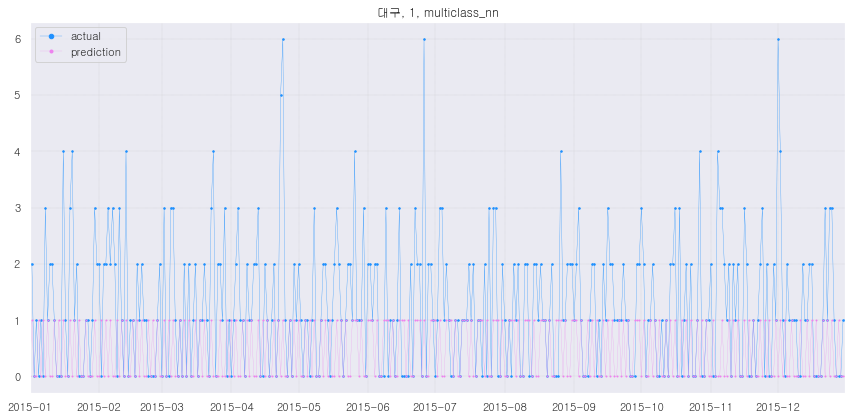

1.4391778474922161


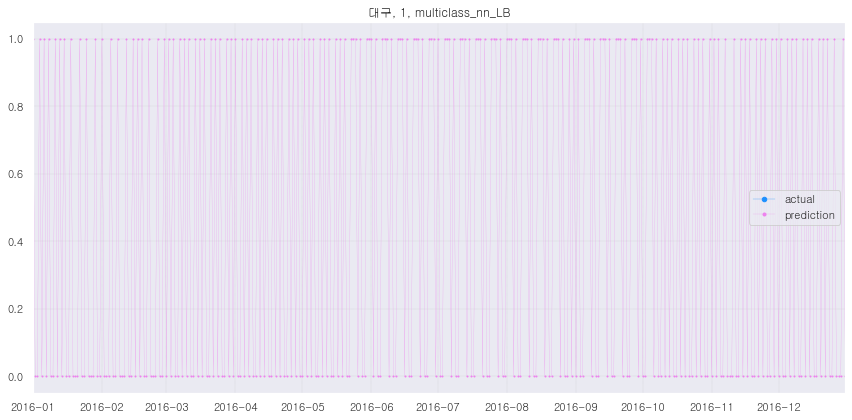

============================ 대구 2 ============================
Epoch 1/10
9/9 [==============================] - 5s 67ms/step - loss: 1.7625 - root_mean_squared_error: 0.3147 - val_loss: 1.4865 - val_root_mean_squared_error: 0.3034
Epoch 2/10
9/9 [==============================] - 0s 17ms/step - loss: 1.4529 - root_mean_squared_error: 0.3025 - val_loss: 1.4526 - val_root_mean_squared_error: 0.3017
Epoch 3/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4271 - root_mean_squared_error: 0.3019 - val_loss: 1.4487 - val_root_mean_squared_error: 0.3014
Epoch 4/10
9/9 [==============================] - 0s 26ms/step - loss: 1.4067 - root_mean_squared_error: 0.3007 - val_loss: 1.4423 - val_root_mean_squared_error: 0.3012
Epoch 5/10
9/9 [==============================] - 0s 33ms/step - loss: 1.4024 - root_mean_squared_error: 0.3005 - val_loss: 1.4443 - val_root_mean_squared_error: 0.3009
Epoch 6/10
9/9 [==============================] - 0s 24ms/step - loss: 1.3980 - root_mean_sq

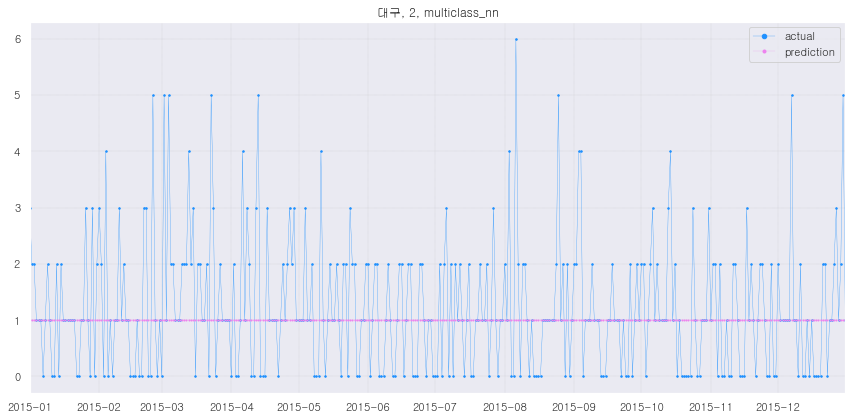

1.186684110486945


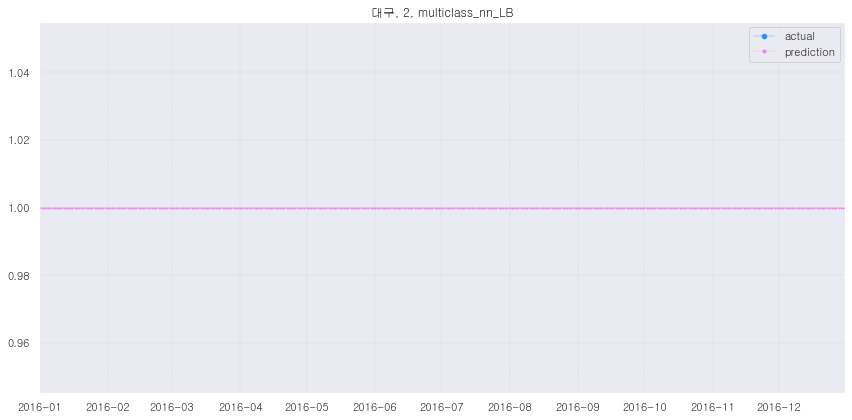

============================ 세종 1 ============================
Epoch 1/10
9/9 [==============================] - 2s 56ms/step - loss: 0.4972 - root_mean_squared_error: 0.2221 - val_loss: 0.3104 - val_root_mean_squared_error: 0.1874
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 0.2599 - root_mean_squared_error: 0.1690 - val_loss: 0.2775 - val_root_mean_squared_error: 0.1855
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 0.2494 - root_mean_squared_error: 0.1697 - val_loss: 0.3045 - val_root_mean_squared_error: 0.1961
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 0.2498 - root_mean_squared_error: 0.1656 - val_loss: 0.2788 - val_root_mean_squared_error: 0.1854
Epoch 5/10
58/58 [==============================] - 0s 2ms/step - loss: 1.6387 - root_mean_squared_error: 0.2776

 Accuracy: 0.2776


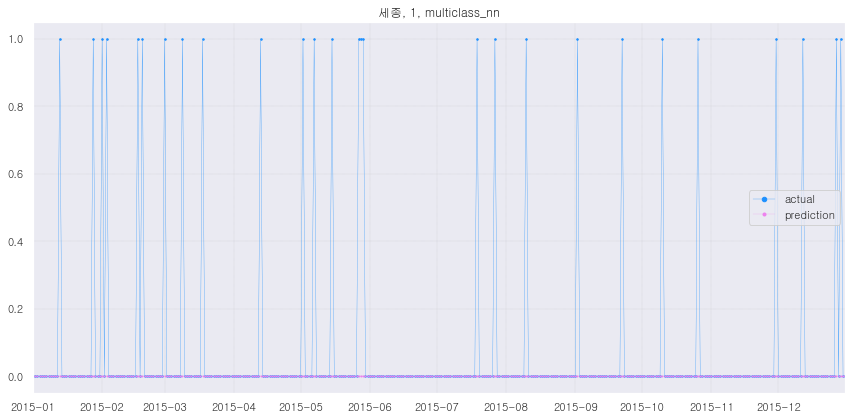

0.27197904834697473


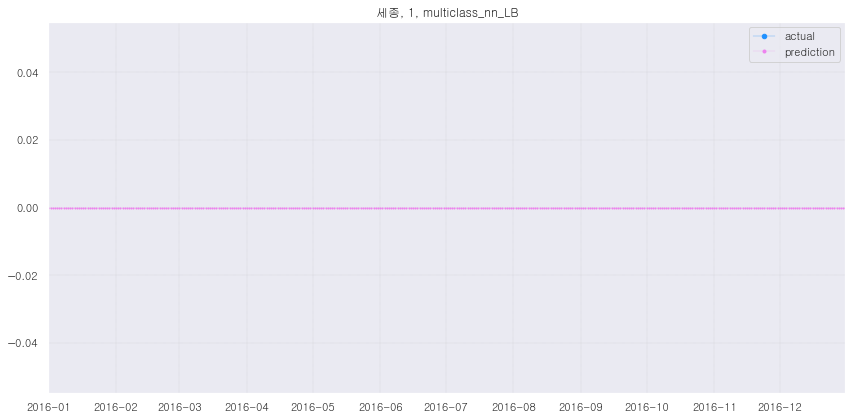

============================ 세종 2 ============================
Epoch 1/10
9/9 [==============================] - 2s 81ms/step - loss: 0.6161 - root_mean_squared_error: 0.2436 - val_loss: 0.2685 - val_root_mean_squared_error: 0.1716
Epoch 2/10
9/9 [==============================] - 0s 18ms/step - loss: 0.2012 - root_mean_squared_error: 0.1356 - val_loss: 0.2550 - val_root_mean_squared_error: 0.1696
Epoch 3/10
9/9 [==============================] - 0s 19ms/step - loss: 0.1869 - root_mean_squared_error: 0.1399 - val_loss: 0.2393 - val_root_mean_squared_error: 0.1680
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 0.1913 - root_mean_squared_error: 0.1407 - val_loss: 0.2361 - val_root_mean_squared_error: 0.1674
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 0.1813 - root_mean_squared_error: 0.1391 - val_loss: 0.2350 - val_root_mean_squared_error: 0.1669
Epoch 6/10
9/9 [==============================] - 0s 17ms/step - loss: 0.1756 - root_mean_sq

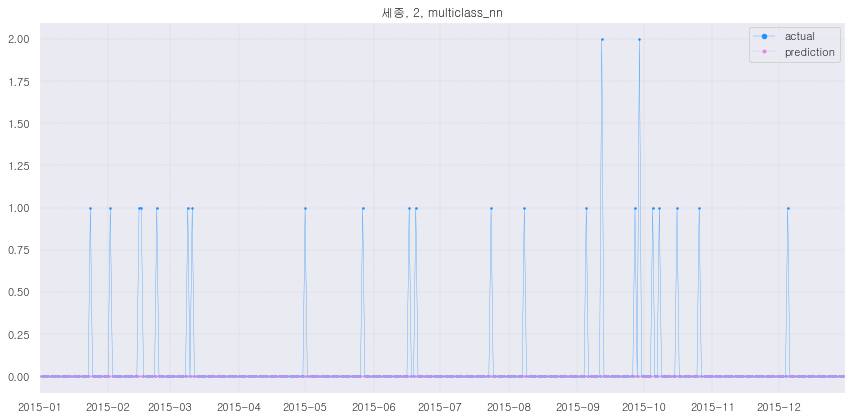

0.2769699058871257


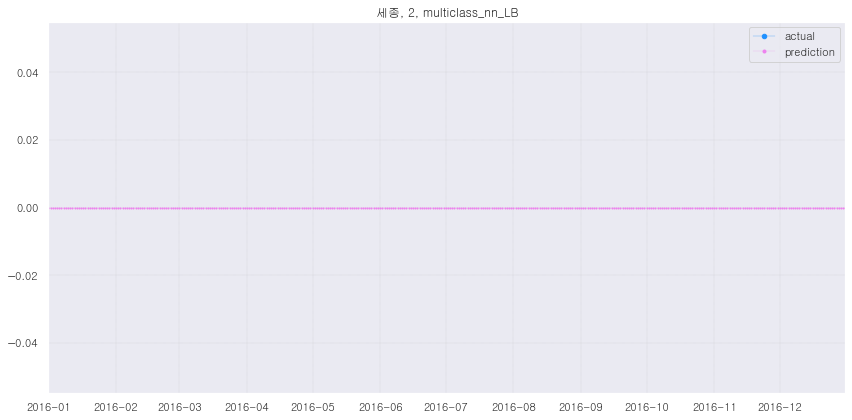

============================ 경남 1 ============================
Epoch 1/10
9/9 [==============================] - 8s 79ms/step - loss: 2.1277 - root_mean_squared_error: 0.2790 - val_loss: 1.9346 - val_root_mean_squared_error: 0.2737
Epoch 2/10
9/9 [==============================] - 0s 20ms/step - loss: 1.8559 - root_mean_squared_error: 0.2722 - val_loss: 1.8356 - val_root_mean_squared_error: 0.2719
Epoch 3/10
9/9 [==============================] - 0s 20ms/step - loss: 1.8367 - root_mean_squared_error: 0.2732 - val_loss: 1.8026 - val_root_mean_squared_error: 0.2712
Epoch 4/10
9/9 [==============================] - 0s 17ms/step - loss: 1.7932 - root_mean_squared_error: 0.2720 - val_loss: 1.7914 - val_root_mean_squared_error: 0.2710
Epoch 5/10
9/9 [==============================] - 0s 19ms/step - loss: 1.7704 - root_mean_squared_error: 0.2710 - val_loss: 1.7914 - val_root_mean_squared_error: 0.2715
Epoch 6/10
9/9 [==============================] - 0s 18ms/step - loss: 1.7667 - root_mean_sq

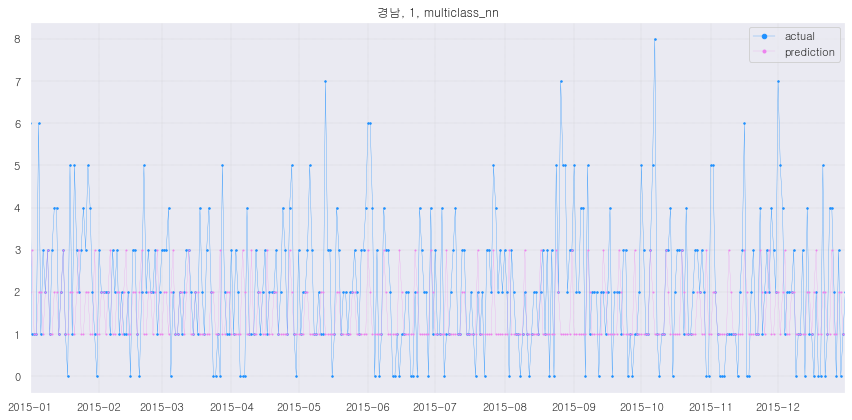

1.72888435006232


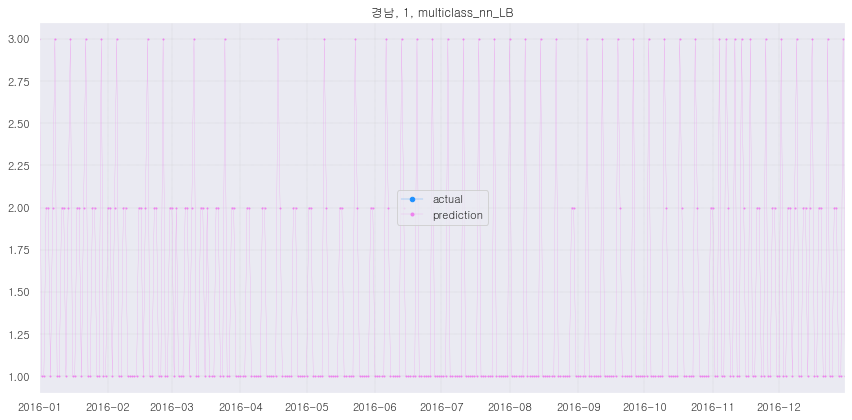

============================ 경남 2 ============================
Epoch 1/10
9/9 [==============================] - 4s 93ms/step - loss: 2.1316 - root_mean_squared_error: 0.2794 - val_loss: 1.9401 - val_root_mean_squared_error: 0.2772
Epoch 2/10
9/9 [==============================] - 0s 17ms/step - loss: 1.8443 - root_mean_squared_error: 0.2731 - val_loss: 1.8304 - val_root_mean_squared_error: 0.2723
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 1.8038 - root_mean_squared_error: 0.2717 - val_loss: 1.8383 - val_root_mean_squared_error: 0.2736
Epoch 4/10
9/9 [==============================] - 0s 16ms/step - loss: 1.7972 - root_mean_squared_error: 0.2711 - val_loss: 1.8121 - val_root_mean_squared_error: 0.2720
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 1.7990 - root_mean_squared_error: 0.2719 - val_loss: 1.8181 - val_root_mean_squared_error: 0.2725
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 1.7660 - root_mean_sq

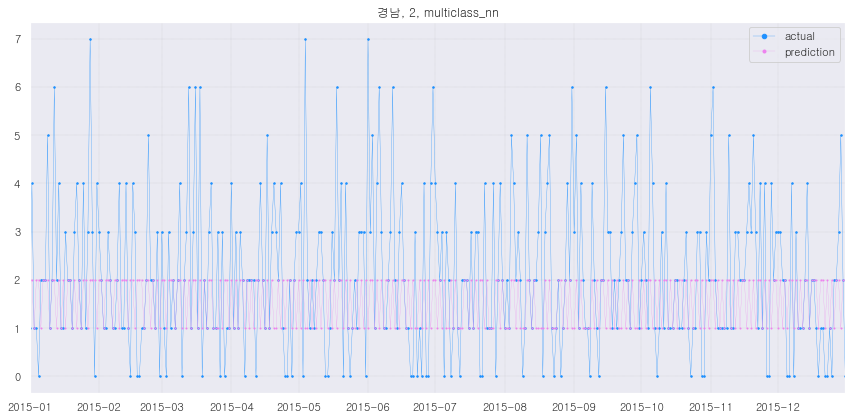

1.7233290497460518


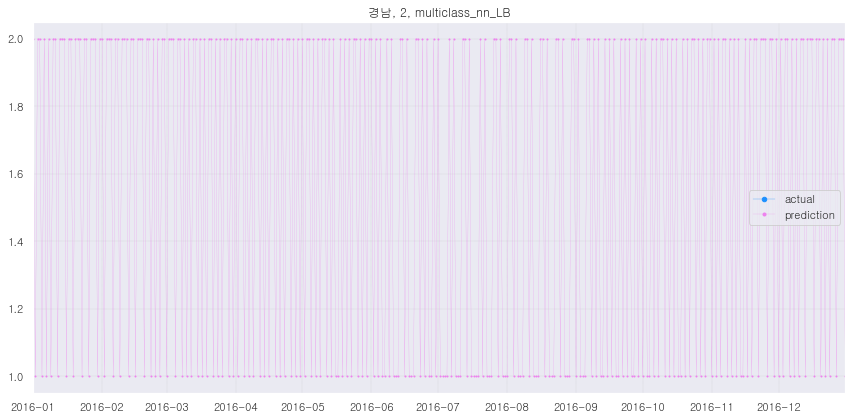

============================ 전북 1 ============================
Epoch 1/10
9/9 [==============================] - 3s 94ms/step - loss: 1.7249 - root_mean_squared_error: 0.3145 - val_loss: 1.4244 - val_root_mean_squared_error: 0.3002
Epoch 2/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4744 - root_mean_squared_error: 0.3044 - val_loss: 1.3660 - val_root_mean_squared_error: 0.2972
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 1.4542 - root_mean_squared_error: 0.3034 - val_loss: 1.3678 - val_root_mean_squared_error: 0.2975
Epoch 4/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4564 - root_mean_squared_error: 0.3037 - val_loss: 1.3584 - val_root_mean_squared_error: 0.2971
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 1.4392 - root_mean_squared_error: 0.3027 - val_loss: 1.3535 - val_root_mean_squared_error: 0.2966
Epoch 6/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4388 - root_mean_sq

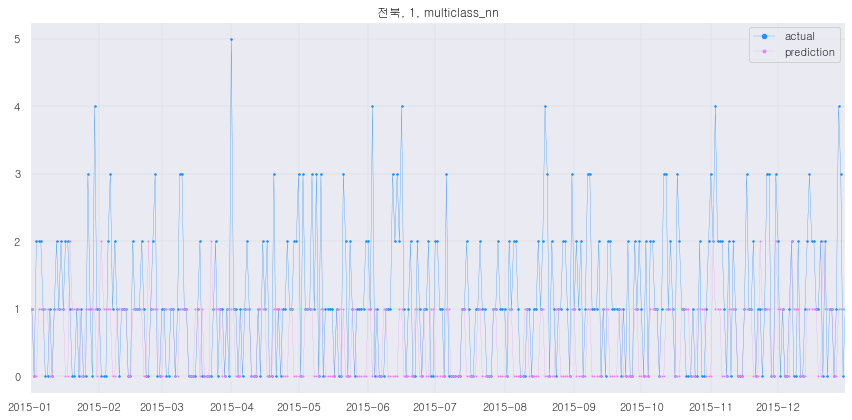

1.2275379077928685


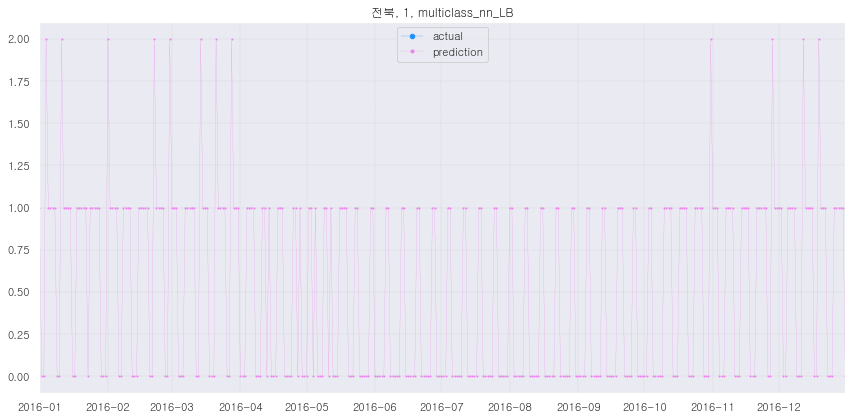

============================ 전북 2 ============================
Epoch 1/10
9/9 [==============================] - 4s 91ms/step - loss: 1.8091 - root_mean_squared_error: 0.2986 - val_loss: 1.6472 - val_root_mean_squared_error: 0.2928
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 1.5957 - root_mean_squared_error: 0.2906 - val_loss: 1.6177 - val_root_mean_squared_error: 0.2927
Epoch 3/10
9/9 [==============================] - 0s 15ms/step - loss: 1.5617 - root_mean_squared_error: 0.2897 - val_loss: 1.6063 - val_root_mean_squared_error: 0.2921
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 1.5720 - root_mean_squared_error: 0.2910 - val_loss: 1.5918 - val_root_mean_squared_error: 0.2917
Epoch 5/10
9/9 [==============================] - 0s 16ms/step - loss: 1.5517 - root_mean_squared_error: 0.2893 - val_loss: 1.5925 - val_root_mean_squared_error: 0.2920
Epoch 6/10
9/9 [==============================] - 0s 18ms/step - loss: 1.5422 - root_mean_sq

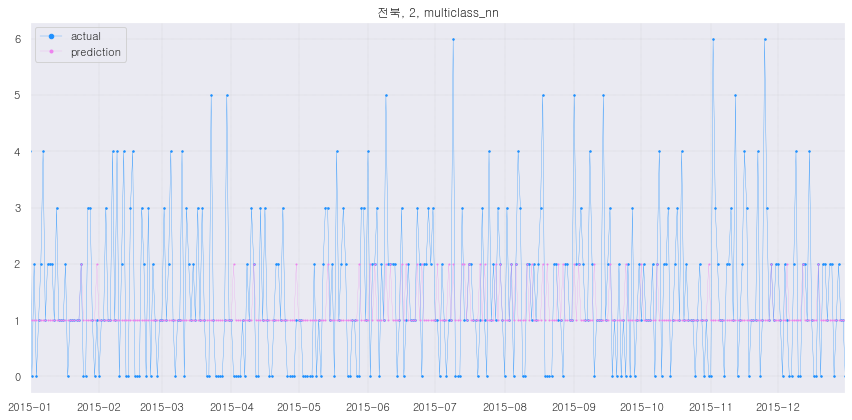

1.3639186092295756


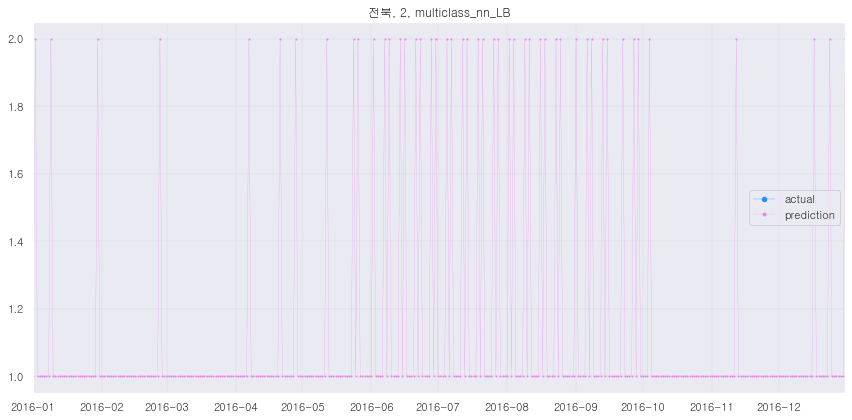

============================ 전남 1 ============================
Epoch 1/10
9/9 [==============================] - 2s 57ms/step - loss: 1.8475 - root_mean_squared_error: 0.2993 - val_loss: 1.6635 - val_root_mean_squared_error: 0.2935
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 1.6303 - root_mean_squared_error: 0.2918 - val_loss: 1.6008 - val_root_mean_squared_error: 0.2916
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 1.5795 - root_mean_squared_error: 0.2898 - val_loss: 1.5766 - val_root_mean_squared_error: 0.2910
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 1.5598 - root_mean_squared_error: 0.2900 - val_loss: 1.5876 - val_root_mean_squared_error: 0.2926
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 1.5623 - root_mean_squared_error: 0.2909 - val_loss: 1.5757 - val_root_mean_squared_error: 0.2915
Epoch 6/10
9/9 [==============================] - 0s 14ms/step - loss: 1.5531 - root_mean_sq

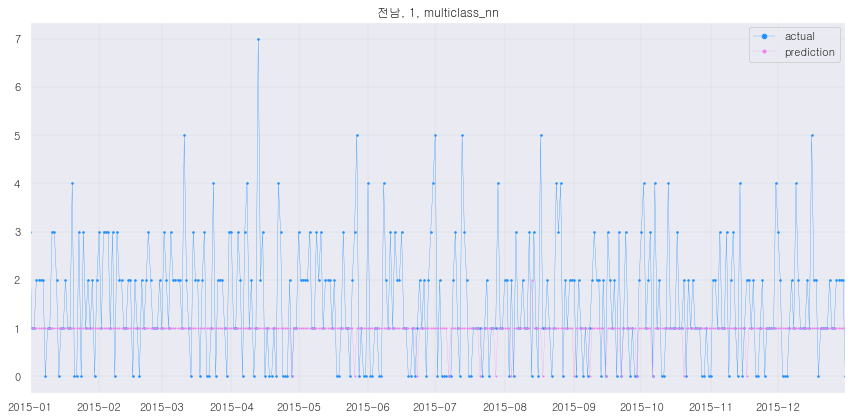

1.354849230857871


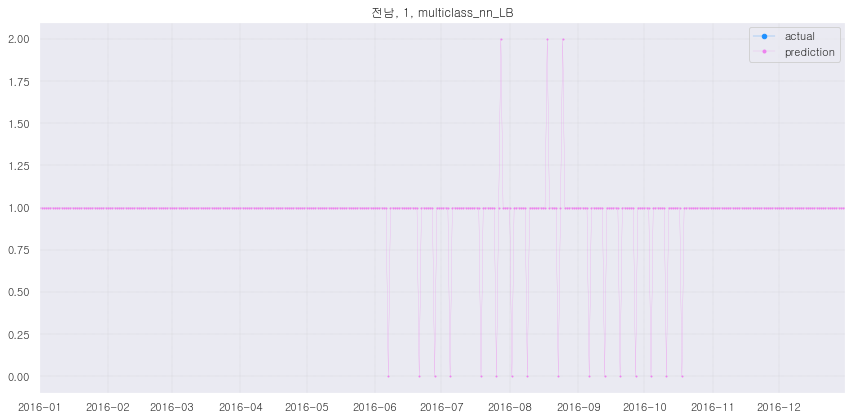

============================ 전남 2 ============================
Epoch 1/10
9/9 [==============================] - 3s 152ms/step - loss: 2.0877 - root_mean_squared_error: 0.2916 - val_loss: 1.8910 - val_root_mean_squared_error: 0.2862
Epoch 2/10
9/9 [==============================] - 0s 15ms/step - loss: 1.7600 - root_mean_squared_error: 0.2815 - val_loss: 1.7170 - val_root_mean_squared_error: 0.2820
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 1.7117 - root_mean_squared_error: 0.2808 - val_loss: 1.7263 - val_root_mean_squared_error: 0.2839
Epoch 4/10
9/9 [==============================] - 0s 22ms/step - loss: 1.6872 - root_mean_squared_error: 0.2814 - val_loss: 1.6900 - val_root_mean_squared_error: 0.2814
Epoch 5/10
9/9 [==============================] - 0s 21ms/step - loss: 1.6657 - root_mean_squared_error: 0.2789 - val_loss: 1.6892 - val_root_mean_squared_error: 0.2821
Epoch 6/10
9/9 [==============================] - 0s 17ms/step - loss: 1.6450 - root_mean_s

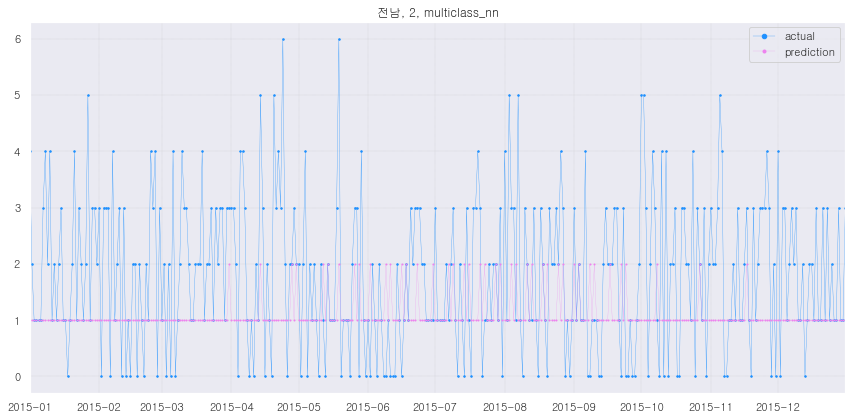

1.5367640793617081


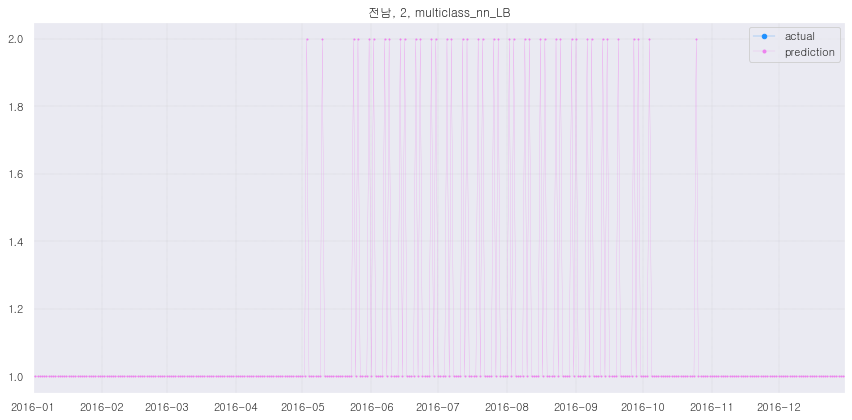

============================ 충북 1 ============================
Epoch 1/10
9/9 [==============================] - 3s 57ms/step - loss: 1.6696 - root_mean_squared_error: 0.3096 - val_loss: 1.4829 - val_root_mean_squared_error: 0.3023
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 1.3850 - root_mean_squared_error: 0.2982 - val_loss: 1.4198 - val_root_mean_squared_error: 0.2985
Epoch 3/10
9/9 [==============================] - 0s 14ms/step - loss: 1.3425 - root_mean_squared_error: 0.2960 - val_loss: 1.4088 - val_root_mean_squared_error: 0.2983
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 1.3455 - root_mean_squared_error: 0.2970 - val_loss: 1.4059 - val_root_mean_squared_error: 0.2983
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 1.3303 - root_mean_squared_error: 0.2957 - val_loss: 1.3945 - val_root_mean_squared_error: 0.2980
Epoch 6/10
9/9 [==============================] - 0s 13ms/step - loss: 1.3242 - root_mean_sq

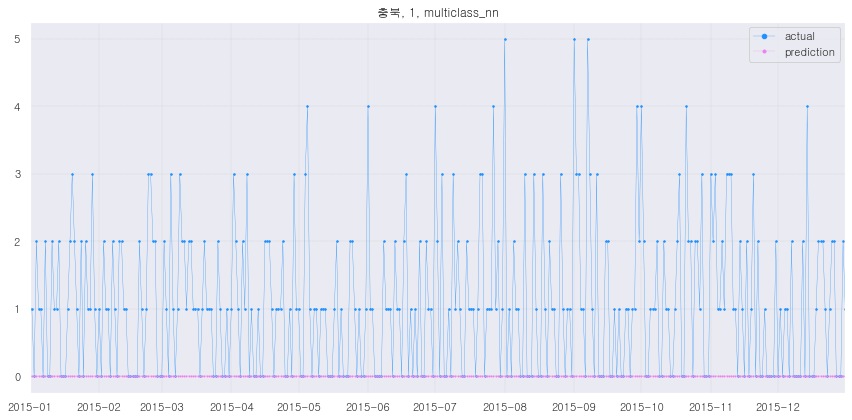

1.5429912241513946


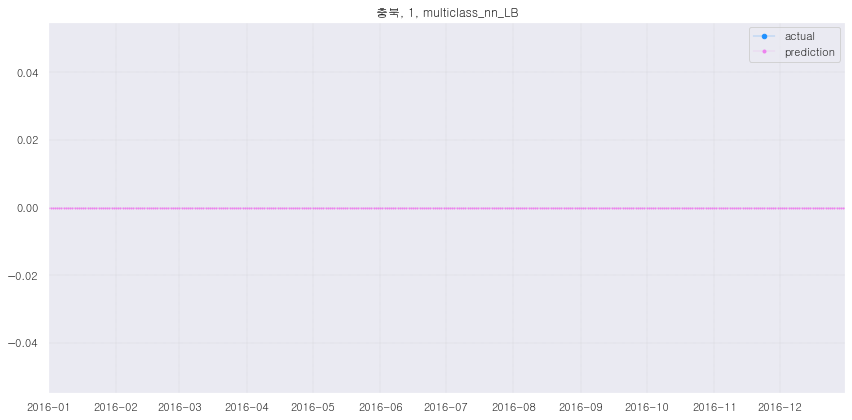

============================ 충북 2 ============================
Epoch 1/10
9/9 [==============================] - 2s 57ms/step - loss: 1.5832 - root_mean_squared_error: 0.3060 - val_loss: 1.4305 - val_root_mean_squared_error: 0.3035
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 1.3397 - root_mean_squared_error: 0.2952 - val_loss: 1.3709 - val_root_mean_squared_error: 0.2983
Epoch 3/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3169 - root_mean_squared_error: 0.2953 - val_loss: 1.3715 - val_root_mean_squared_error: 0.2989
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 1.3211 - root_mean_squared_error: 0.2944 - val_loss: 1.3798 - val_root_mean_squared_error: 0.2998
Epoch 5/10
9/9 [==============================] - 0s 16ms/step - loss: 1.3018 - root_mean_squared_error: 0.2929 - val_loss: 1.3636 - val_root_mean_squared_error: 0.2985
Epoch 6/10
9/9 [==============================] - 0s 14ms/step - loss: 1.2947 - root_mean_sq

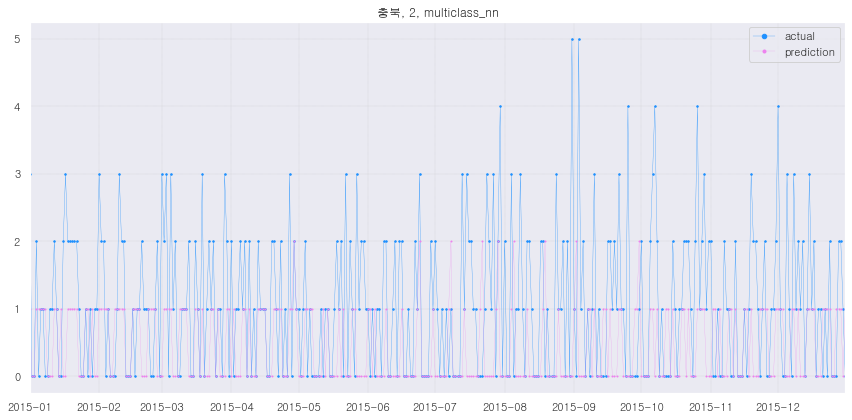

1.2948792718887439


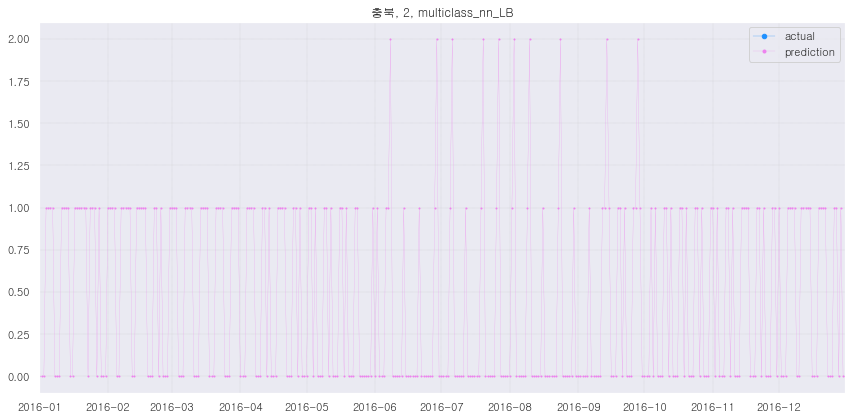

============================ 강원 1 ============================
Epoch 1/10
9/9 [==============================] - 3s 93ms/step - loss: 1.7979 - root_mean_squared_error: 0.2959 - val_loss: 1.5818 - val_root_mean_squared_error: 0.2891
Epoch 2/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4480 - root_mean_squared_error: 0.2835 - val_loss: 1.5474 - val_root_mean_squared_error: 0.2893
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 1.4405 - root_mean_squared_error: 0.2849 - val_loss: 1.5193 - val_root_mean_squared_error: 0.2874
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 1.4066 - root_mean_squared_error: 0.2822 - val_loss: 1.5120 - val_root_mean_squared_error: 0.2870
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3839 - root_mean_squared_error: 0.2809 - val_loss: 1.5181 - val_root_mean_squared_error: 0.2881
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3806 - root_mean_sq

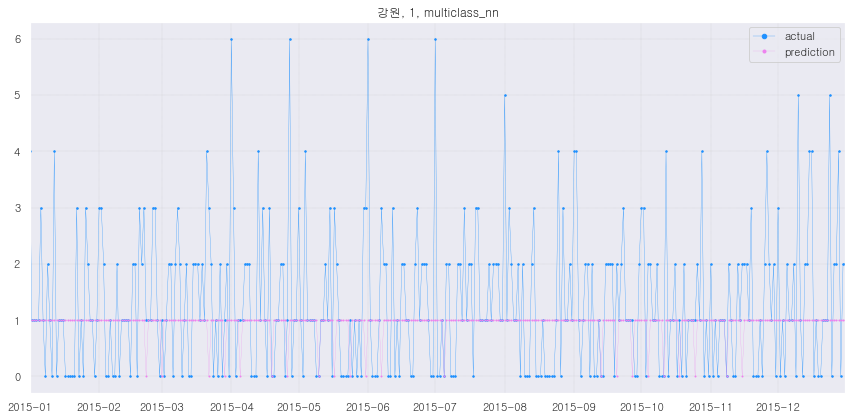

1.3210622541924566


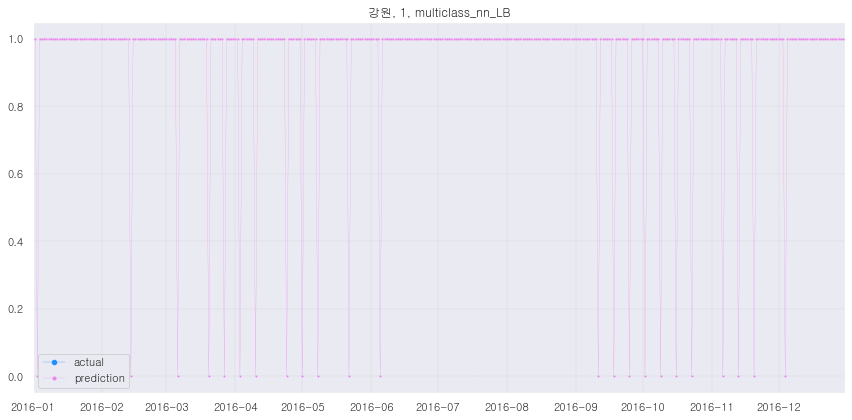

============================ 강원 2 ============================
Epoch 1/10
9/9 [==============================] - 3s 97ms/step - loss: 1.5593 - root_mean_squared_error: 0.3265 - val_loss: 1.3600 - val_root_mean_squared_error: 0.3172
Epoch 2/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3613 - root_mean_squared_error: 0.3167 - val_loss: 1.3361 - val_root_mean_squared_error: 0.3164
Epoch 3/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3261 - root_mean_squared_error: 0.3148 - val_loss: 1.3256 - val_root_mean_squared_error: 0.3164
Epoch 4/10
9/9 [==============================] - 0s 16ms/step - loss: 1.3313 - root_mean_squared_error: 0.3152 - val_loss: 1.3205 - val_root_mean_squared_error: 0.3166
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3156 - root_mean_squared_error: 0.3140 - val_loss: 1.3250 - val_root_mean_squared_error: 0.3167
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3227 - root_mean_sq

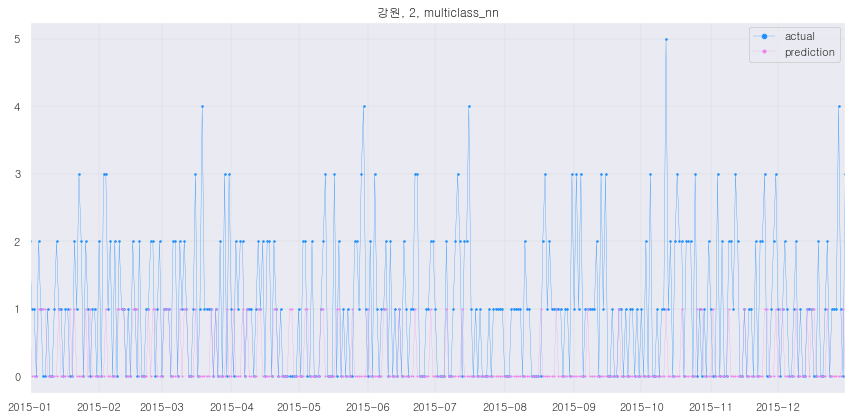

1.3231345099825826


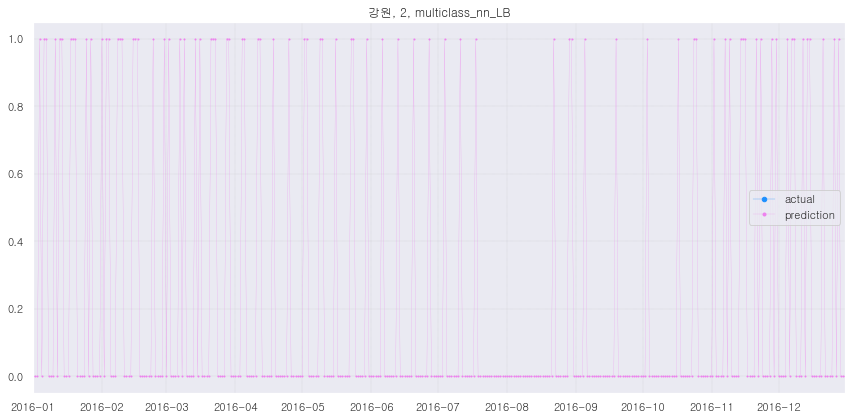

============================ 부산 1 ============================
Epoch 1/10
9/9 [==============================] - 3s 66ms/step - loss: 1.9927 - root_mean_squared_error: 0.2894 - val_loss: 1.7912 - val_root_mean_squared_error: 0.2828
Epoch 2/10
9/9 [==============================] - 0s 19ms/step - loss: 1.8016 - root_mean_squared_error: 0.2839 - val_loss: 1.7460 - val_root_mean_squared_error: 0.2823
Epoch 3/10
9/9 [==============================] - 0s 16ms/step - loss: 1.7537 - root_mean_squared_error: 0.2830 - val_loss: 1.7327 - val_root_mean_squared_error: 0.2823
Epoch 4/10
9/9 [==============================] - 0s 16ms/step - loss: 1.7438 - root_mean_squared_error: 0.2830 - val_loss: 1.7075 - val_root_mean_squared_error: 0.2815
Epoch 5/10
9/9 [==============================] - 0s 16ms/step - loss: 1.7211 - root_mean_squared_error: 0.2820 - val_loss: 1.7077 - val_root_mean_squared_error: 0.2820
Epoch 6/10
9/9 [==============================] - 0s 17ms/step - loss: 1.7086 - root_mean_sq

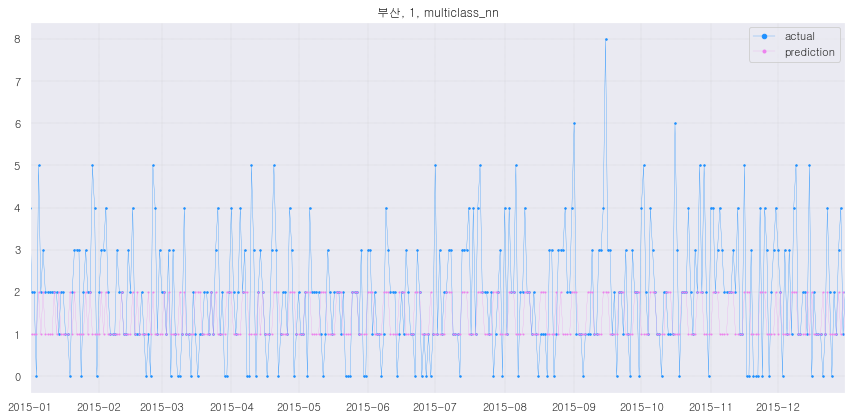

1.4997716721198433


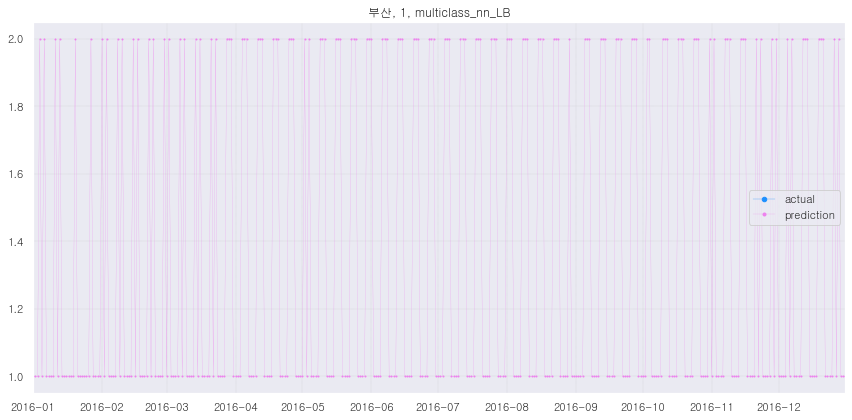

============================ 부산 2 ============================
Epoch 1/10
9/9 [==============================] - 2s 67ms/step - loss: 1.9009 - root_mean_squared_error: 0.3026 - val_loss: 1.6964 - val_root_mean_squared_error: 0.2960
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 1.6794 - root_mean_squared_error: 0.2950 - val_loss: 1.6609 - val_root_mean_squared_error: 0.2947
Epoch 3/10
9/9 [==============================] - 0s 14ms/step - loss: 1.6541 - root_mean_squared_error: 0.2946 - val_loss: 1.6640 - val_root_mean_squared_error: 0.2954
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 1.6352 - root_mean_squared_error: 0.2942 - val_loss: 1.6463 - val_root_mean_squared_error: 0.2940
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 1.6322 - root_mean_squared_error: 0.2938 - val_loss: 1.6589 - val_root_mean_squared_error: 0.2950
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 1.6274 - root_mean_sq

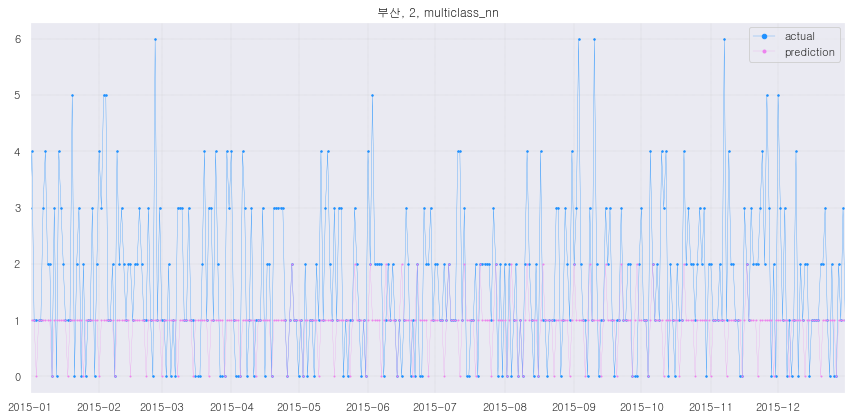

1.532300625033956


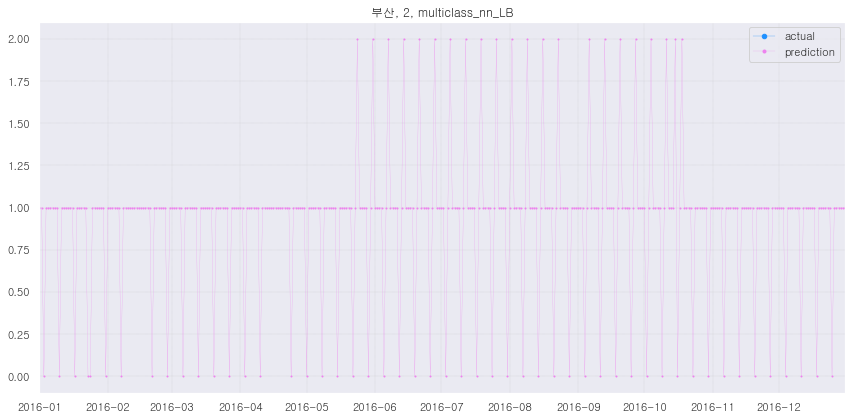

============================ 광주 1 ============================
Epoch 1/10
9/9 [==============================] - 5s 112ms/step - loss: 1.5317 - root_mean_squared_error: 0.3212 - val_loss: 1.1908 - val_root_mean_squared_error: 0.2982
Epoch 2/10
9/9 [==============================] - 0s 29ms/step - loss: 1.1644 - root_mean_squared_error: 0.2975 - val_loss: 1.1357 - val_root_mean_squared_error: 0.2959
Epoch 3/10
9/9 [==============================] - 0s 15ms/step - loss: 1.1057 - root_mean_squared_error: 0.2925 - val_loss: 1.1479 - val_root_mean_squared_error: 0.3010
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 1.1006 - root_mean_squared_error: 0.2930 - val_loss: 1.1180 - val_root_mean_squared_error: 0.2957
Epoch 5/10
9/9 [==============================] - 0s 17ms/step - loss: 1.1044 - root_mean_squared_error: 0.2938 - val_loss: 1.1267 - val_root_mean_squared_error: 0.2978
Epoch 6/10
9/9 [==============================] - 0s 34ms/step - loss: 1.0921 - root_mean_s

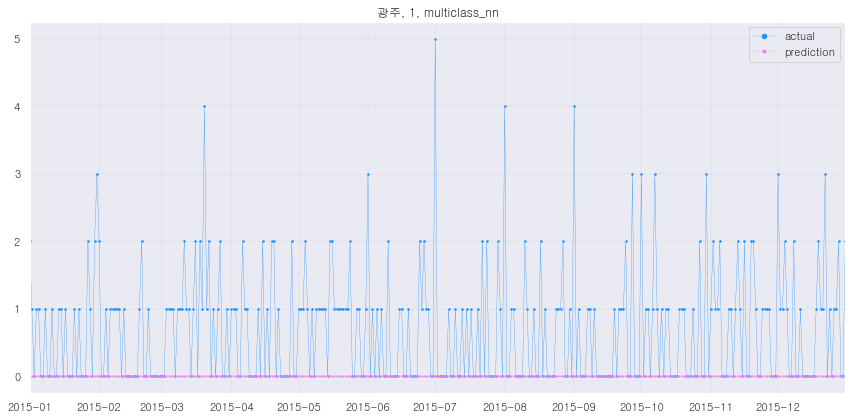

1.0954451150103321


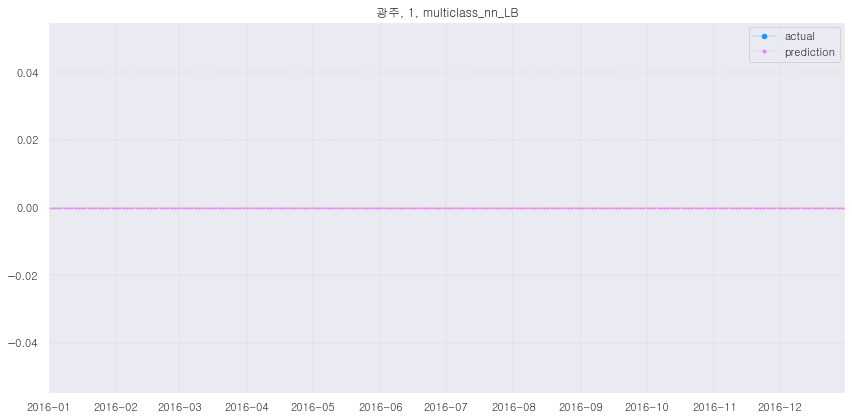

============================ 광주 2 ============================
Epoch 1/10
9/9 [==============================] - 3s 119ms/step - loss: 1.5860 - root_mean_squared_error: 0.3270 - val_loss: 1.3432 - val_root_mean_squared_error: 0.3211
Epoch 2/10
9/9 [==============================] - 0s 22ms/step - loss: 1.2684 - root_mean_squared_error: 0.3101 - val_loss: 1.2498 - val_root_mean_squared_error: 0.3089
Epoch 3/10
9/9 [==============================] - 0s 27ms/step - loss: 1.2323 - root_mean_squared_error: 0.3055 - val_loss: 1.2394 - val_root_mean_squared_error: 0.3084
Epoch 4/10
9/9 [==============================] - 0s 25ms/step - loss: 1.2240 - root_mean_squared_error: 0.3067 - val_loss: 1.2499 - val_root_mean_squared_error: 0.3112
Epoch 5/10
9/9 [==============================] - 0s 24ms/step - loss: 1.2216 - root_mean_squared_error: 0.3064 - val_loss: 1.2339 - val_root_mean_squared_error: 0.3074
Epoch 6/10
9/9 [==============================] - 1s 71ms/step - loss: 1.2159 - root_mean_s

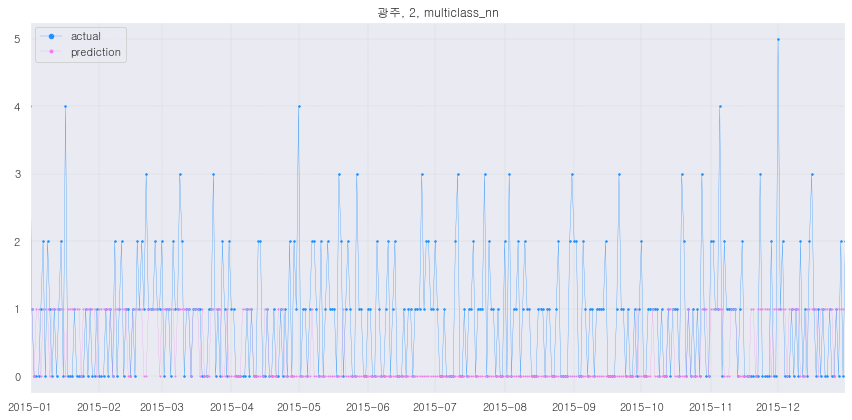

1.1527216156937767


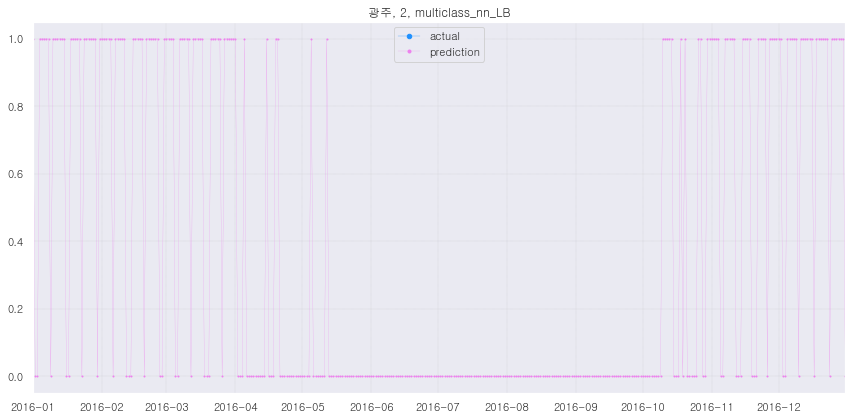

============================ 대전 1 ============================
Epoch 1/10
9/9 [==============================] - 4s 76ms/step - loss: 1.5436 - root_mean_squared_error: 0.3228 - val_loss: 1.1895 - val_root_mean_squared_error: 0.2990
Epoch 2/10
9/9 [==============================] - 0s 20ms/step - loss: 1.1736 - root_mean_squared_error: 0.2996 - val_loss: 1.1398 - val_root_mean_squared_error: 0.2985
Epoch 3/10
9/9 [==============================] - 0s 23ms/step - loss: 1.1565 - root_mean_squared_error: 0.3005 - val_loss: 1.1228 - val_root_mean_squared_error: 0.2971
Epoch 4/10
9/9 [==============================] - 0s 24ms/step - loss: 1.1232 - root_mean_squared_error: 0.2967 - val_loss: 1.1257 - val_root_mean_squared_error: 0.2973
Epoch 5/10
9/9 [==============================] - 0s 24ms/step - loss: 1.1256 - root_mean_squared_error: 0.2974 - val_loss: 1.1082 - val_root_mean_squared_error: 0.2969
Epoch 6/10
9/9 [==============================] - 0s 26ms/step - loss: 1.1094 - root_mean_sq

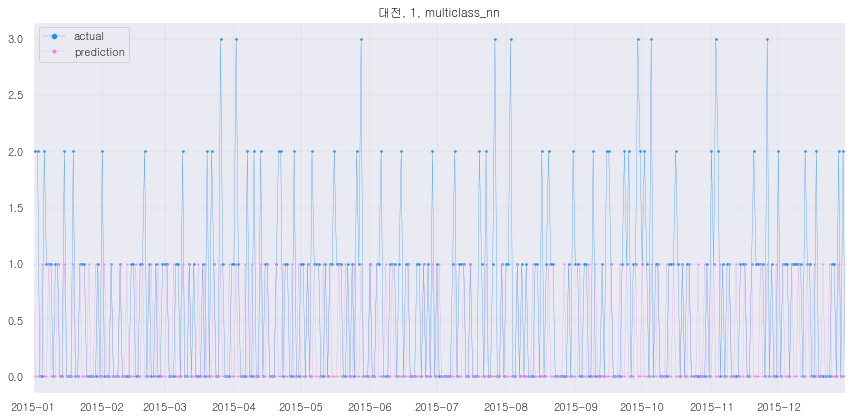

0.9551590271380404


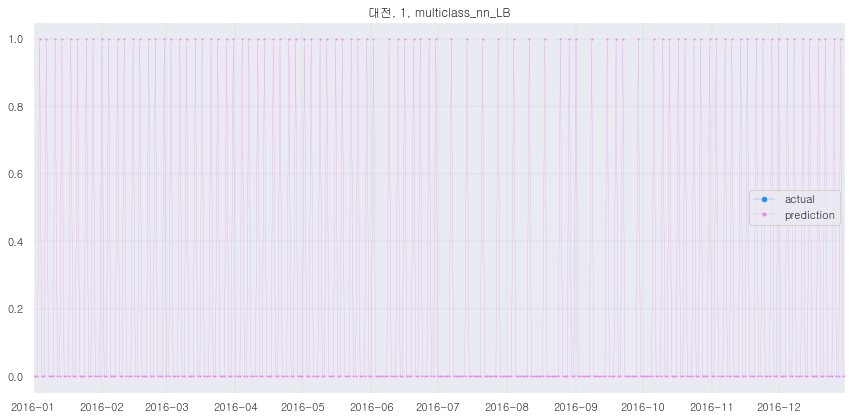

============================ 대전 2 ============================
Epoch 1/10
9/9 [==============================] - 4s 93ms/step - loss: 1.3762 - root_mean_squared_error: 0.3383 - val_loss: 1.0848 - val_root_mean_squared_error: 0.3193
Epoch 2/10
9/9 [==============================] - 0s 27ms/step - loss: 1.1140 - root_mean_squared_error: 0.3223 - val_loss: 1.0666 - val_root_mean_squared_error: 0.3175
Epoch 3/10
9/9 [==============================] - 0s 27ms/step - loss: 1.0852 - root_mean_squared_error: 0.3209 - val_loss: 1.0732 - val_root_mean_squared_error: 0.3194
Epoch 4/10
9/9 [==============================] - 0s 25ms/step - loss: 1.0770 - root_mean_squared_error: 0.3194 - val_loss: 1.0638 - val_root_mean_squared_error: 0.3181
Epoch 5/10
9/9 [==============================] - 0s 21ms/step - loss: 1.0692 - root_mean_squared_error: 0.3186 - val_loss: 1.0453 - val_root_mean_squared_error: 0.3148
Epoch 6/10
9/9 [==============================] - 0s 21ms/step - loss: 1.0623 - root_mean_sq

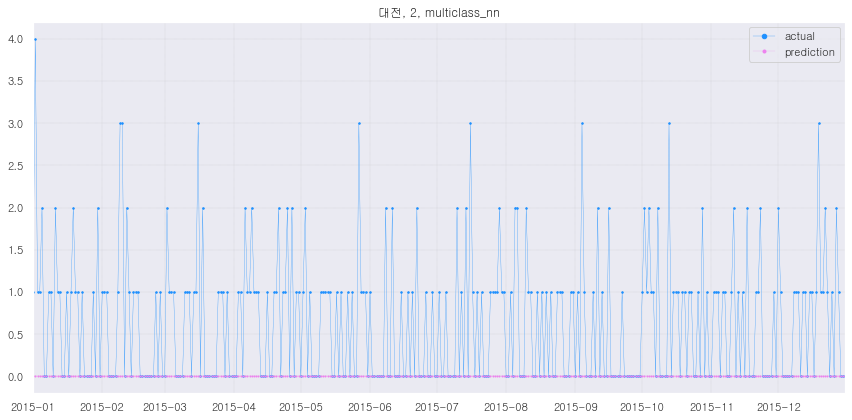

0.9931270663228415


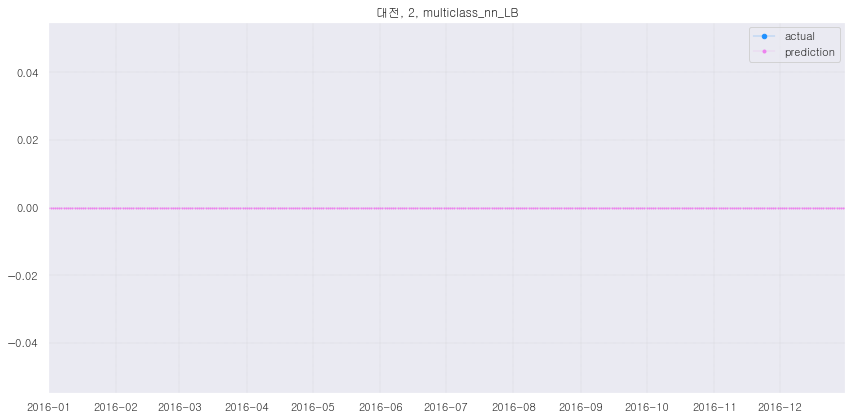

============================ 서울 1 ============================
Epoch 1/10
9/9 [==============================] - 4s 87ms/step - loss: 2.4029 - root_mean_squared_error: 0.2531 - val_loss: 2.2258 - val_root_mean_squared_error: 0.2500
Epoch 2/10
9/9 [==============================] - 0s 21ms/step - loss: 2.1601 - root_mean_squared_error: 0.2487 - val_loss: 2.1809 - val_root_mean_squared_error: 0.2500
Epoch 3/10
9/9 [==============================] - 0s 34ms/step - loss: 2.1355 - root_mean_squared_error: 0.2483 - val_loss: 2.1577 - val_root_mean_squared_error: 0.2497
Epoch 4/10
9/9 [==============================] - 0s 22ms/step - loss: 2.1144 - root_mean_squared_error: 0.2480 - val_loss: 2.1495 - val_root_mean_squared_error: 0.2495
Epoch 5/10
9/9 [==============================] - 0s 22ms/step - loss: 2.1171 - root_mean_squared_error: 0.2478 - val_loss: 2.1487 - val_root_mean_squared_error: 0.2494
Epoch 6/10
9/9 [==============================] - 0s 23ms/step - loss: 2.0986 - root_mean_sq

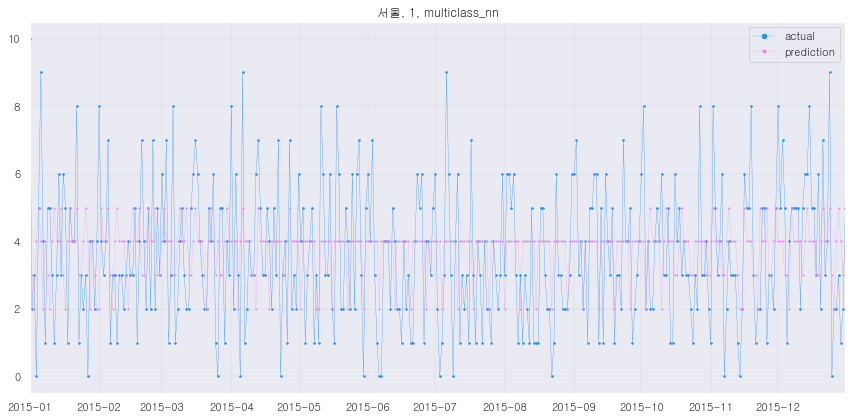

2.0877988671299352


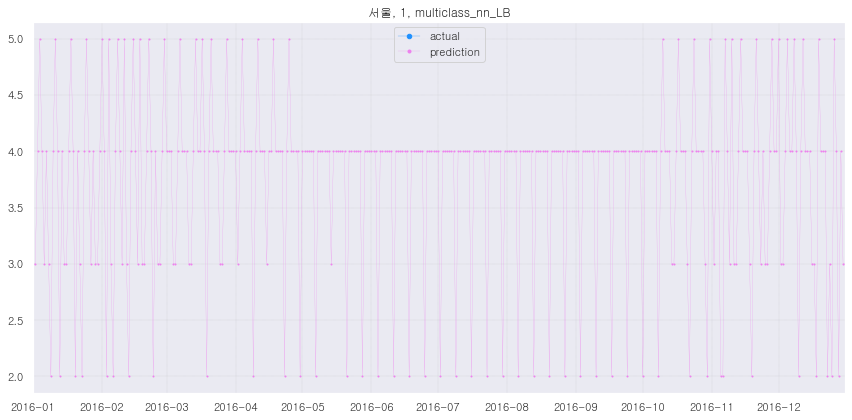

============================ 서울 2 ============================
Epoch 1/10
9/9 [==============================] - 4s 124ms/step - loss: 2.4204 - root_mean_squared_error: 0.2634 - val_loss: 2.2549 - val_root_mean_squared_error: 0.2596
Epoch 2/10
9/9 [==============================] - 0s 24ms/step - loss: 2.1527 - root_mean_squared_error: 0.2577 - val_loss: 2.1634 - val_root_mean_squared_error: 0.2576
Epoch 3/10
9/9 [==============================] - 0s 24ms/step - loss: 2.0992 - root_mean_squared_error: 0.2569 - val_loss: 2.1584 - val_root_mean_squared_error: 0.2583
Epoch 4/10
9/9 [==============================] - 0s 19ms/step - loss: 2.0610 - root_mean_squared_error: 0.2558 - val_loss: 2.0972 - val_root_mean_squared_error: 0.2564
Epoch 5/10
9/9 [==============================] - 0s 24ms/step - loss: 2.0417 - root_mean_squared_error: 0.2551 - val_loss: 2.1005 - val_root_mean_squared_error: 0.2568
Epoch 6/10
9/9 [==============================] - 0s 24ms/step - loss: 2.0468 - root_mean_s

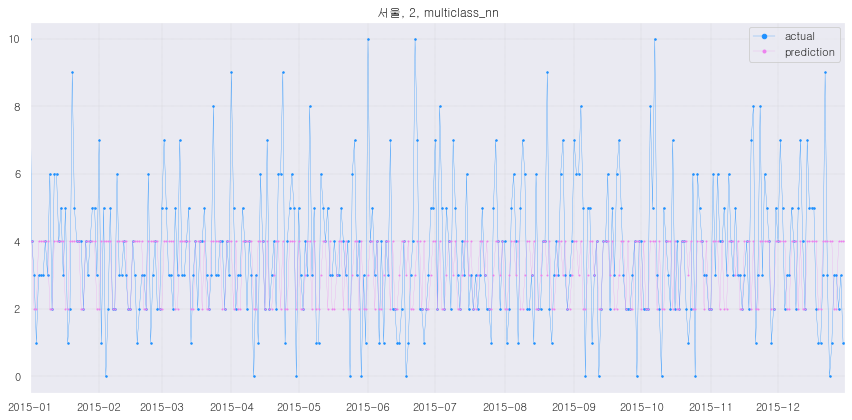

2.0447058267164544


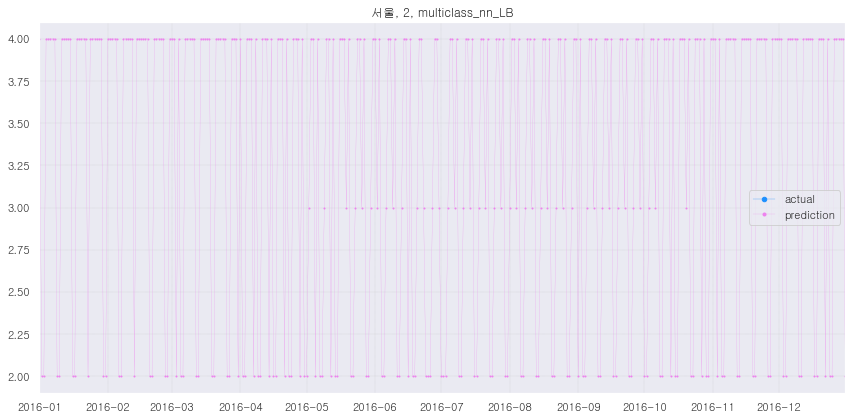

============================ 울산 1 ============================
Epoch 1/10
9/9 [==============================] - 4s 80ms/step - loss: 1.1663 - root_mean_squared_error: 0.3502 - val_loss: 0.9694 - val_root_mean_squared_error: 0.3290
Epoch 2/10
9/9 [==============================] - 0s 19ms/step - loss: 0.9401 - root_mean_squared_error: 0.3248 - val_loss: 0.9392 - val_root_mean_squared_error: 0.3256
Epoch 3/10
9/9 [==============================] - 0s 18ms/step - loss: 0.9123 - root_mean_squared_error: 0.3223 - val_loss: 0.9344 - val_root_mean_squared_error: 0.3250
Epoch 4/10
9/9 [==============================] - 0s 17ms/step - loss: 0.9132 - root_mean_squared_error: 0.3205 - val_loss: 0.9530 - val_root_mean_squared_error: 0.3278
Epoch 5/10
9/9 [==============================] - 0s 20ms/step - loss: 0.9202 - root_mean_squared_error: 0.3235 - val_loss: 0.9295 - val_root_mean_squared_error: 0.3250
Epoch 6/10
9/9 [==============================] - 0s 19ms/step - loss: 0.8977 - root_mean_sq

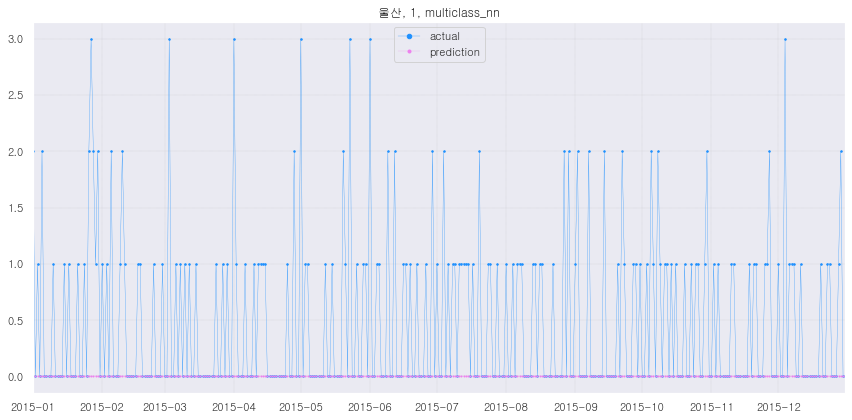

0.8568818911276312


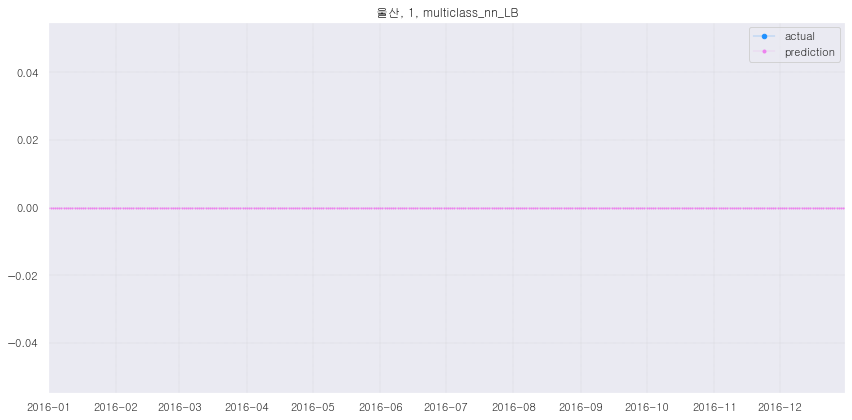

============================ 울산 2 ============================
Epoch 1/10
9/9 [==============================] - 3s 91ms/step - loss: 1.2208 - root_mean_squared_error: 0.3219 - val_loss: 0.9346 - val_root_mean_squared_error: 0.2988
Epoch 2/10
9/9 [==============================] - 0s 19ms/step - loss: 0.9440 - root_mean_squared_error: 0.2963 - val_loss: 0.8956 - val_root_mean_squared_error: 0.2962
Epoch 3/10
9/9 [==============================] - 0s 20ms/step - loss: 0.9183 - root_mean_squared_error: 0.2944 - val_loss: 0.9244 - val_root_mean_squared_error: 0.3026
Epoch 4/10
9/9 [==============================] - 0s 16ms/step - loss: 0.9191 - root_mean_squared_error: 0.2955 - val_loss: 0.8934 - val_root_mean_squared_error: 0.2961
Epoch 5/10
9/9 [==============================] - 0s 22ms/step - loss: 0.9044 - root_mean_squared_error: 0.2927 - val_loss: 0.8908 - val_root_mean_squared_error: 0.2961
Epoch 6/10
9/9 [==============================] - 0s 18ms/step - loss: 0.8950 - root_mean_sq

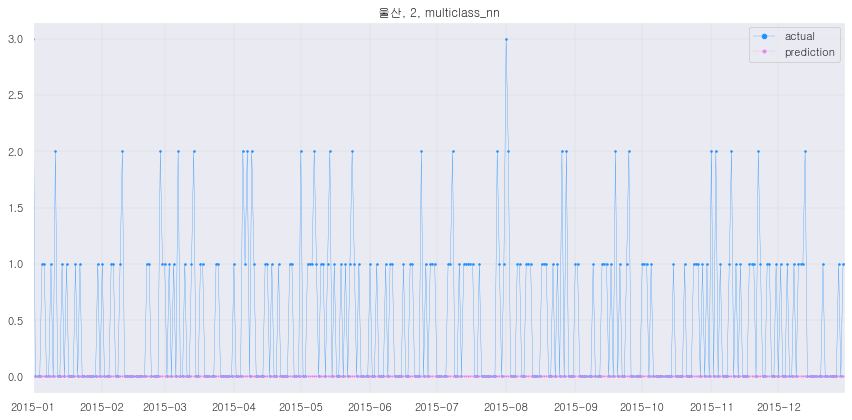

0.8074990987738302


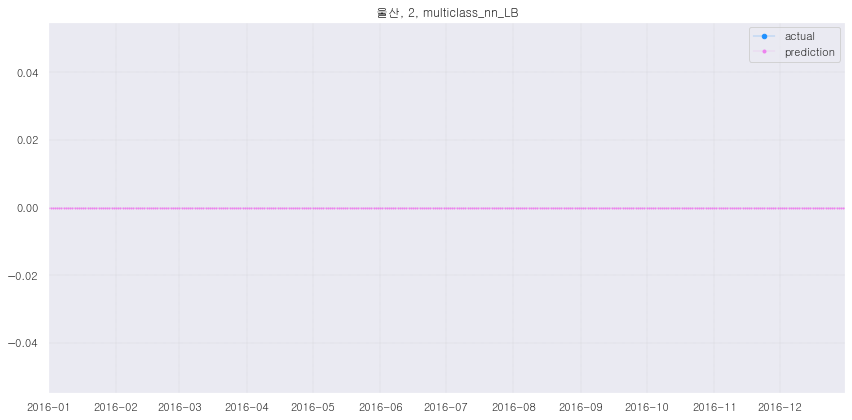

============================ 인천 1 ============================
Epoch 1/10
9/9 [==============================] - 3s 79ms/step - loss: 1.7051 - root_mean_squared_error: 0.3119 - val_loss: 1.4103 - val_root_mean_squared_error: 0.2980
Epoch 2/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4744 - root_mean_squared_error: 0.3039 - val_loss: 1.3719 - val_root_mean_squared_error: 0.2965
Epoch 3/10
9/9 [==============================] - 0s 22ms/step - loss: 1.4372 - root_mean_squared_error: 0.3022 - val_loss: 1.3699 - val_root_mean_squared_error: 0.2970
Epoch 4/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4220 - root_mean_squared_error: 0.3012 - val_loss: 1.3515 - val_root_mean_squared_error: 0.2964
Epoch 5/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4115 - root_mean_squared_error: 0.2997 - val_loss: 1.3560 - val_root_mean_squared_error: 0.2966
Epoch 6/10
9/9 [==============================] - 0s 17ms/step - loss: 1.3937 - root_mean_sq

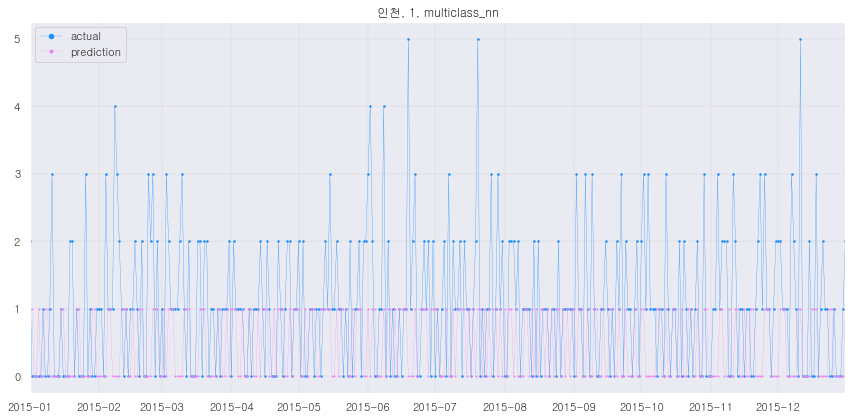

1.2991040115697867


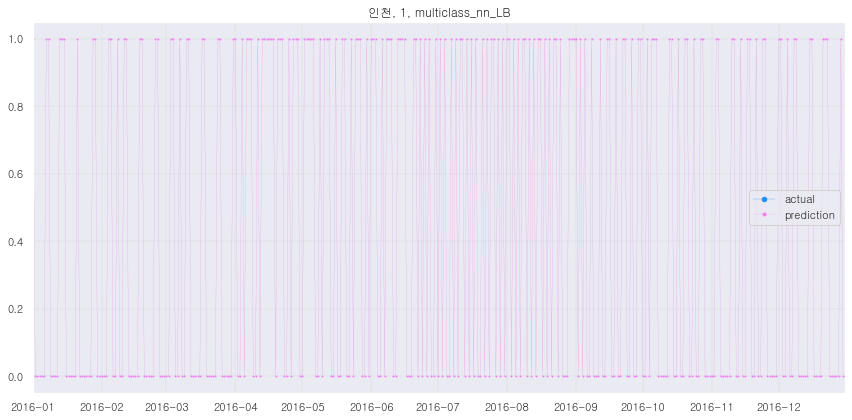

============================ 인천 2 ============================
Epoch 1/10
9/9 [==============================] - 4s 97ms/step - loss: 1.7969 - root_mean_squared_error: 0.2948 - val_loss: 1.4610 - val_root_mean_squared_error: 0.2812
Epoch 2/10
9/9 [==============================] - 0s 17ms/step - loss: 1.4110 - root_mean_squared_error: 0.2803 - val_loss: 1.3778 - val_root_mean_squared_error: 0.2800
Epoch 3/10
9/9 [==============================] - 0s 22ms/step - loss: 1.3513 - root_mean_squared_error: 0.2771 - val_loss: 1.3635 - val_root_mean_squared_error: 0.2810
Epoch 4/10
9/9 [==============================] - 0s 33ms/step - loss: 1.3561 - root_mean_squared_error: 0.2792 - val_loss: 1.3498 - val_root_mean_squared_error: 0.2797
Epoch 5/10
9/9 [==============================] - 0s 21ms/step - loss: 1.3514 - root_mean_squared_error: 0.2796 - val_loss: 1.3433 - val_root_mean_squared_error: 0.2797
Epoch 6/10
9/9 [==============================] - 0s 18ms/step - loss: 1.3332 - root_mean_sq

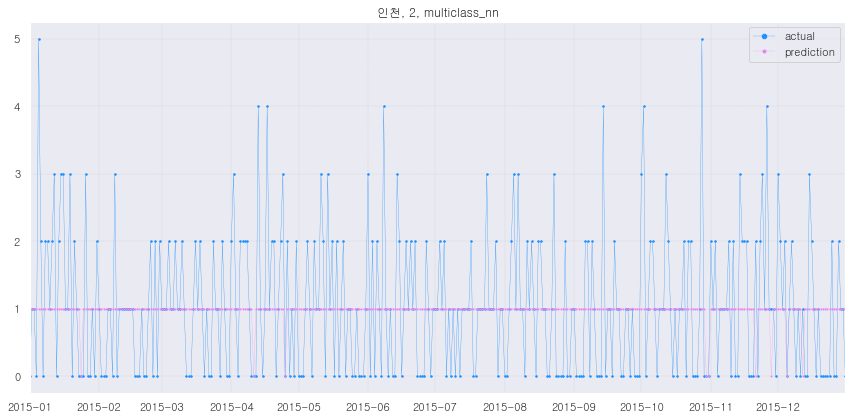

1.0243608097214334


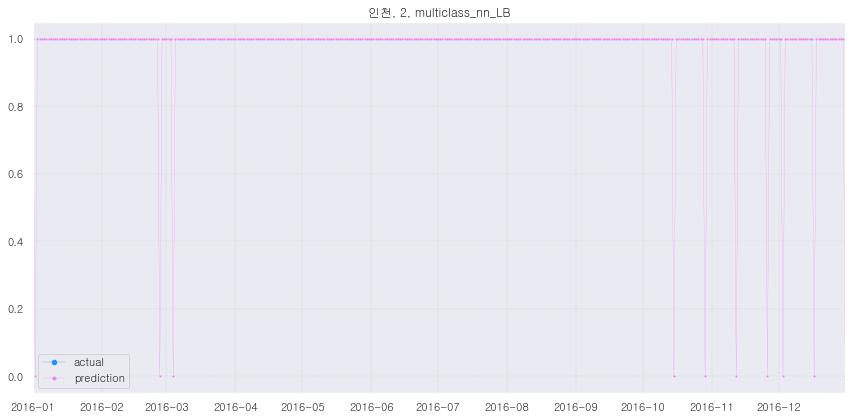

============================ 제주 1 ============================
Epoch 1/10
9/9 [==============================] - 4s 100ms/step - loss: 0.9704 - root_mean_squared_error: 0.3071 - val_loss: 0.7555 - val_root_mean_squared_error: 0.2893
Epoch 2/10
9/9 [==============================] - 0s 17ms/step - loss: 0.7160 - root_mean_squared_error: 0.2763 - val_loss: 0.7202 - val_root_mean_squared_error: 0.2869
Epoch 3/10
9/9 [==============================] - 0s 27ms/step - loss: 0.7016 - root_mean_squared_error: 0.2755 - val_loss: 0.7059 - val_root_mean_squared_error: 0.2854
Epoch 4/10
9/9 [==============================] - 0s 25ms/step - loss: 0.6975 - root_mean_squared_error: 0.2767 - val_loss: 0.7170 - val_root_mean_squared_error: 0.2873
Epoch 5/10
9/9 [==============================] - 0s 21ms/step - loss: 0.6851 - root_mean_squared_error: 0.2749 - val_loss: 0.7021 - val_root_mean_squared_error: 0.2852
Epoch 6/10
9/9 [==============================] - 0s 18ms/step - loss: 0.6937 - root_mean_s

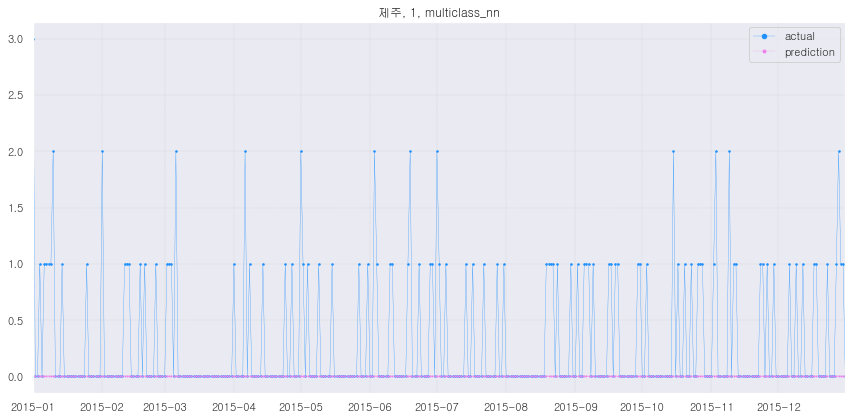

0.614883884795188


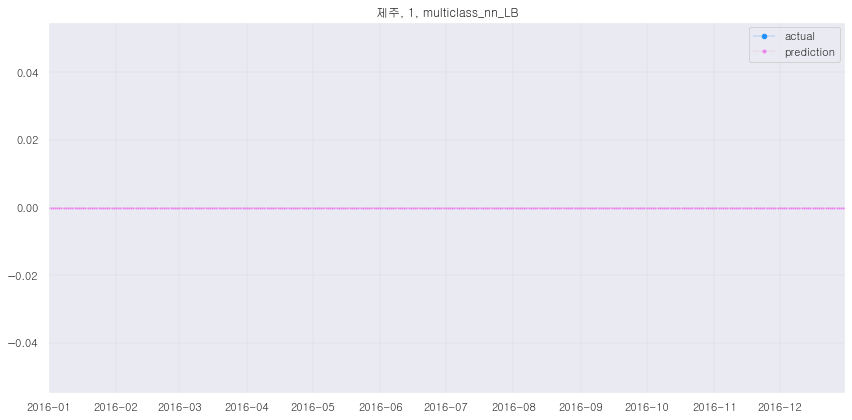

============================ 제주 2 ============================
Epoch 1/10
9/9 [==============================] - 4s 93ms/step - loss: 1.0866 - root_mean_squared_error: 0.3207 - val_loss: 0.7785 - val_root_mean_squared_error: 0.2863
Epoch 2/10
9/9 [==============================] - 0s 18ms/step - loss: 0.6895 - root_mean_squared_error: 0.2719 - val_loss: 0.7435 - val_root_mean_squared_error: 0.2867
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 0.6626 - root_mean_squared_error: 0.2684 - val_loss: 0.7240 - val_root_mean_squared_error: 0.2819
Epoch 4/10
9/9 [==============================] - 0s 19ms/step - loss: 0.6537 - root_mean_squared_error: 0.2662 - val_loss: 0.7299 - val_root_mean_squared_error: 0.2828
Epoch 5/10
9/9 [==============================] - 0s 19ms/step - loss: 0.6563 - root_mean_squared_error: 0.2692 - val_loss: 0.7122 - val_root_mean_squared_error: 0.2811
Epoch 6/10
9/9 [==============================] - 0s 22ms/step - loss: 0.6316 - root_mean_sq

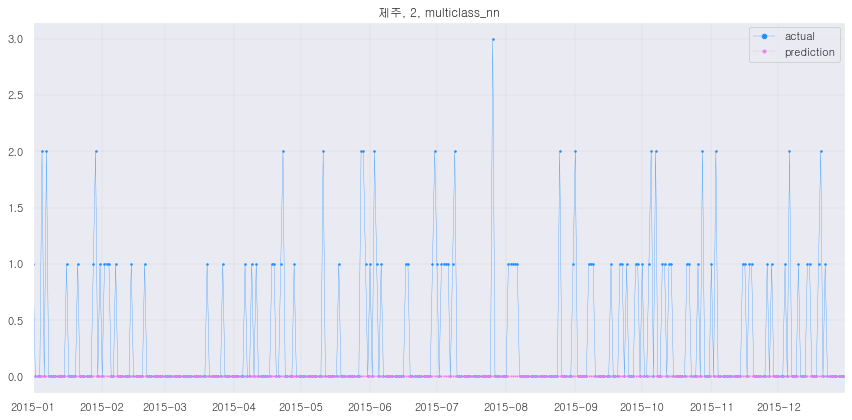

0.6453203515808126


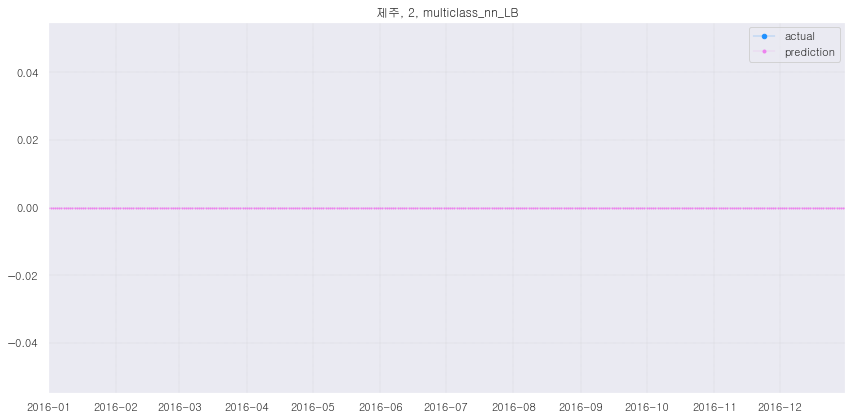

============================ 충남 1 ============================
Epoch 1/10
9/9 [==============================] - 8s 138ms/step - loss: 1.6846 - root_mean_squared_error: 0.3124 - val_loss: 1.4627 - val_root_mean_squared_error: 0.3021
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 1.4560 - root_mean_squared_error: 0.3024 - val_loss: 1.4172 - val_root_mean_squared_error: 0.3005
Epoch 3/10
9/9 [==============================] - 0s 13ms/step - loss: 1.4232 - root_mean_squared_error: 0.3006 - val_loss: 1.4072 - val_root_mean_squared_error: 0.3006
Epoch 4/10
9/9 [==============================] - 0s 22ms/step - loss: 1.4101 - root_mean_squared_error: 0.2998 - val_loss: 1.3970 - val_root_mean_squared_error: 0.2999
Epoch 5/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4015 - root_mean_squared_error: 0.2989 - val_loss: 1.3965 - val_root_mean_squared_error: 0.3003
Epoch 6/10
9/9 [==============================] - 0s 16ms/step - loss: 1.4045 - root_mean_s

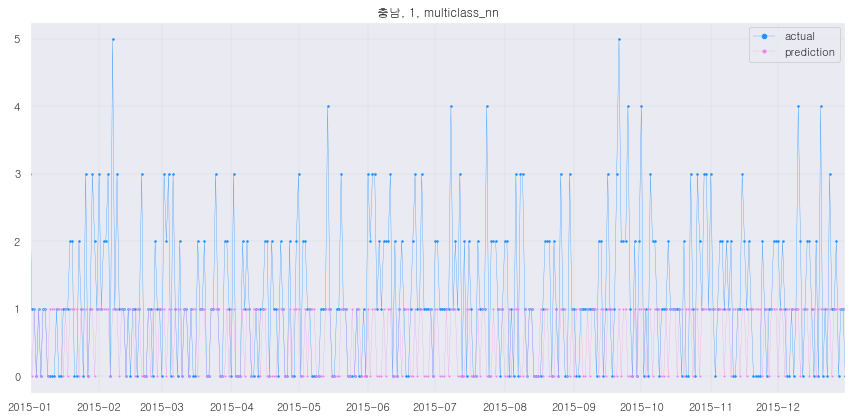

1.2573074078395543


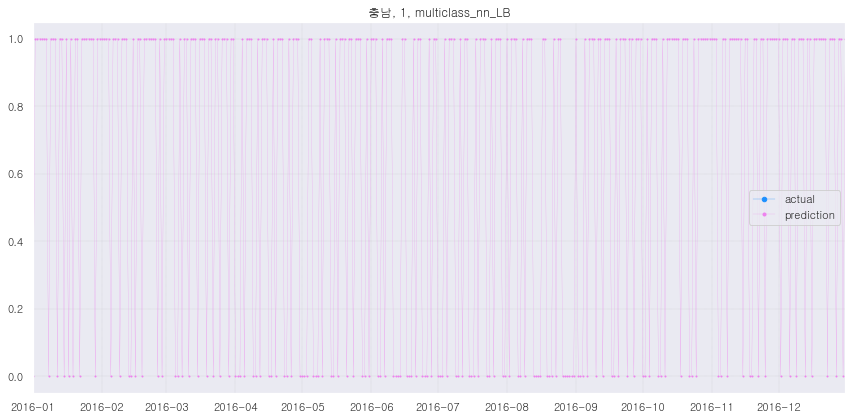

============================ 충남 2 ============================
Epoch 1/10
9/9 [==============================] - 3s 85ms/step - loss: 1.6902 - root_mean_squared_error: 0.3105 - val_loss: 1.4597 - val_root_mean_squared_error: 0.3005
Epoch 2/10
9/9 [==============================] - 0s 18ms/step - loss: 1.4042 - root_mean_squared_error: 0.3000 - val_loss: 1.4407 - val_root_mean_squared_error: 0.3025
Epoch 3/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3836 - root_mean_squared_error: 0.2999 - val_loss: 1.4329 - val_root_mean_squared_error: 0.3031
Epoch 4/10
9/9 [==============================] - 0s 17ms/step - loss: 1.3671 - root_mean_squared_error: 0.2983 - val_loss: 1.3969 - val_root_mean_squared_error: 0.2995
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 1.3505 - root_mean_squared_error: 0.2975 - val_loss: 1.3971 - val_root_mean_squared_error: 0.3009
Epoch 6/10
9/9 [==============================] - 0s 19ms/step - loss: 1.3472 - root_mean_sq

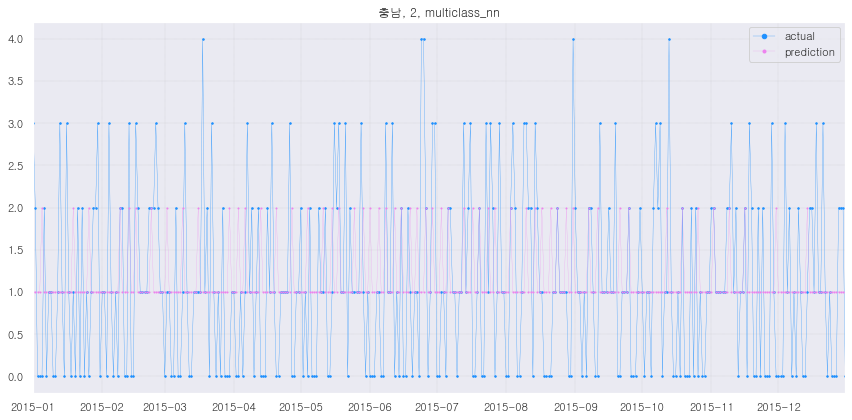

1.0790660599072865


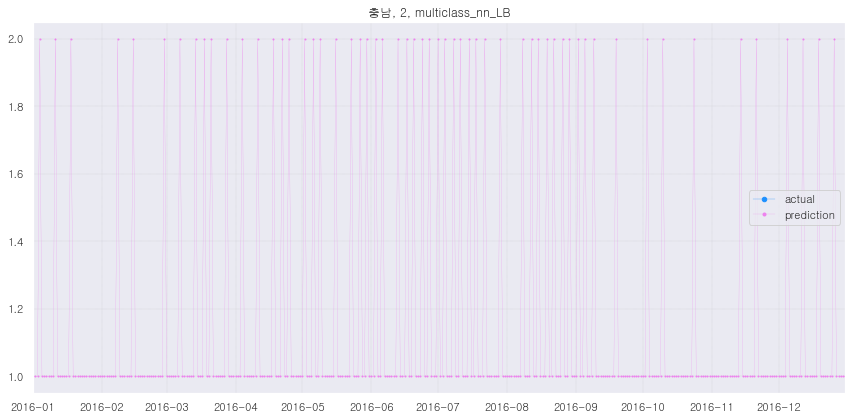

============================ 경기 1 ============================
Epoch 1/10
9/9 [==============================] - 3s 66ms/step - loss: 2.4812 - root_mean_squared_error: 0.2454 - val_loss: 2.3166 - val_root_mean_squared_error: 0.2426
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 2.2664 - root_mean_squared_error: 0.2422 - val_loss: 2.2862 - val_root_mean_squared_error: 0.2426
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 2.2397 - root_mean_squared_error: 0.2417 - val_loss: 2.2396 - val_root_mean_squared_error: 0.2417
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 2.2347 - root_mean_squared_error: 0.2416 - val_loss: 2.2327 - val_root_mean_squared_error: 0.2417
Epoch 5/10
9/9 [==============================] - 0s 16ms/step - loss: 2.2237 - root_mean_squared_error: 0.2414 - val_loss: 2.2399 - val_root_mean_squared_error: 0.2420
Epoch 6/10
9/9 [==============================] - 0s 14ms/step - loss: 2.2075 - root_mean_sq

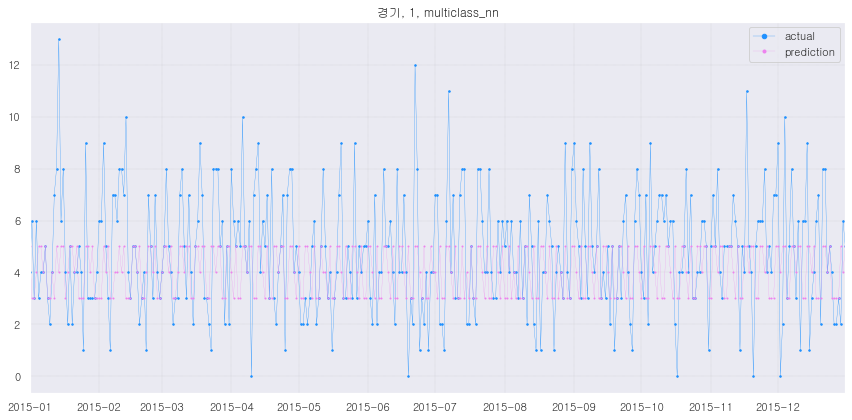

2.423627983569204


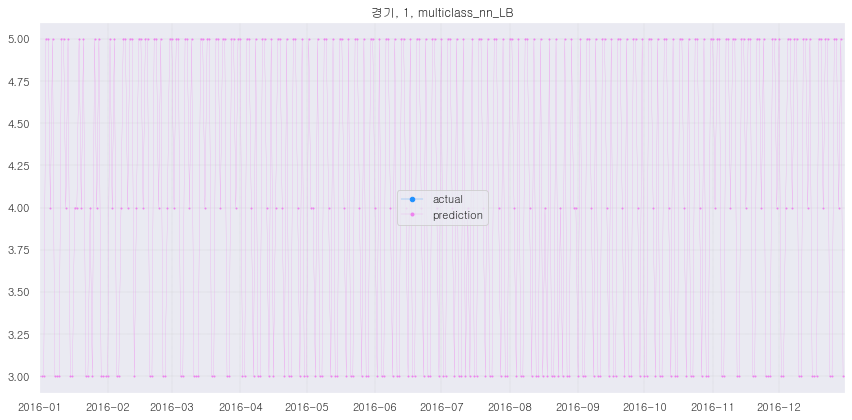

============================ 경기 2 ============================
Epoch 1/10
9/9 [==============================] - 4s 75ms/step - loss: 2.4528 - root_mean_squared_error: 0.2451 - val_loss: 2.3820 - val_root_mean_squared_error: 0.2441
Epoch 2/10
9/9 [==============================] - 0s 15ms/step - loss: 2.2538 - root_mean_squared_error: 0.2423 - val_loss: 2.3564 - val_root_mean_squared_error: 0.2437
Epoch 3/10
9/9 [==============================] - 0s 16ms/step - loss: 2.2432 - root_mean_squared_error: 0.2423 - val_loss: 2.3454 - val_root_mean_squared_error: 0.2436
Epoch 4/10
9/9 [==============================] - 0s 18ms/step - loss: 2.2110 - root_mean_squared_error: 0.2413 - val_loss: 2.3528 - val_root_mean_squared_error: 0.2439
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 2.1930 - root_mean_squared_error: 0.2409 - val_loss: 2.3401 - val_root_mean_squared_error: 0.2436
Epoch 6/10
9/9 [==============================] - 0s 17ms/step - loss: 2.1906 - root_mean_sq

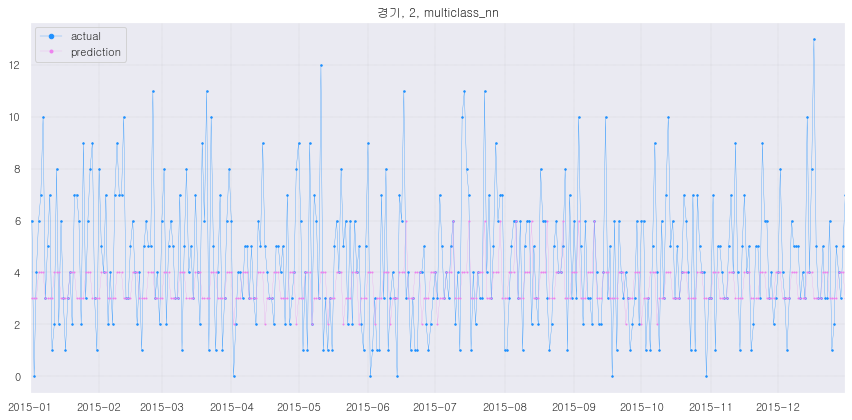

2.618166251510386


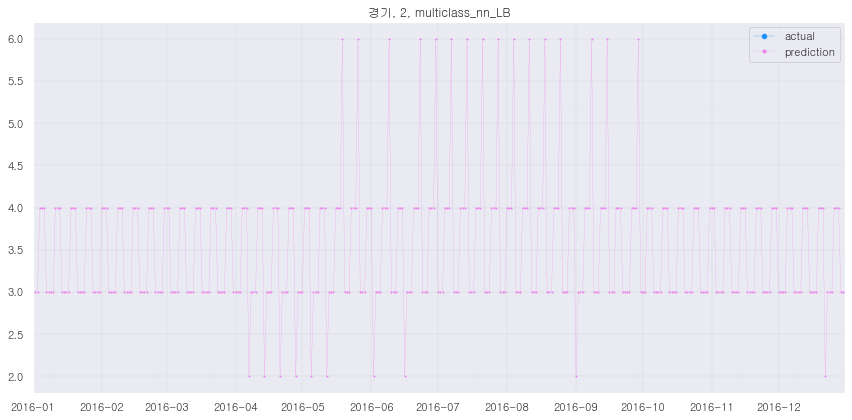

============================ 경북 1 ============================
Epoch 1/10
9/9 [==============================] - 4s 112ms/step - loss: 2.0113 - root_mean_squared_error: 0.2763 - val_loss: 1.7529 - val_root_mean_squared_error: 0.2695
Epoch 2/10
9/9 [==============================] - 0s 16ms/step - loss: 1.7901 - root_mean_squared_error: 0.2709 - val_loss: 1.7237 - val_root_mean_squared_error: 0.2680
Epoch 3/10
9/9 [==============================] - 0s 23ms/step - loss: 1.7576 - root_mean_squared_error: 0.2705 - val_loss: 1.7428 - val_root_mean_squared_error: 0.2695
Epoch 4/10
9/9 [==============================] - 0s 27ms/step - loss: 1.7443 - root_mean_squared_error: 0.2695 - val_loss: 1.7118 - val_root_mean_squared_error: 0.2678
Epoch 5/10
9/9 [==============================] - 0s 29ms/step - loss: 1.7398 - root_mean_squared_error: 0.2698 - val_loss: 1.7051 - val_root_mean_squared_error: 0.2675
Epoch 6/10
9/9 [==============================] - 1s 96ms/step - loss: 1.7273 - root_mean_s

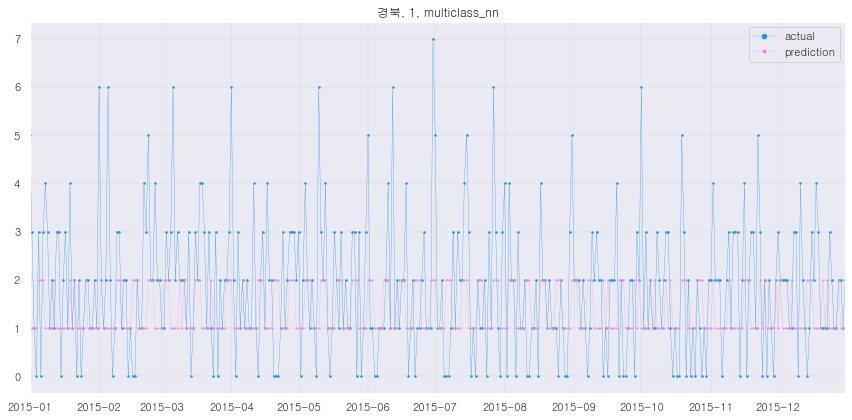

1.5179293755116197


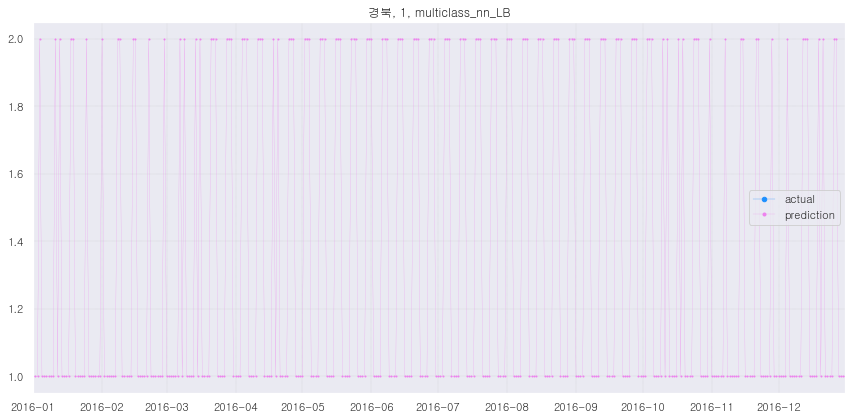

============================ 경북 2 ============================
Epoch 1/10
9/9 [==============================] - 5s 100ms/step - loss: 2.0749 - root_mean_squared_error: 0.2779 - val_loss: 1.7973 - val_root_mean_squared_error: 0.2699
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 1.8187 - root_mean_squared_error: 0.2728 - val_loss: 1.7755 - val_root_mean_squared_error: 0.2698
Epoch 3/10
9/9 [==============================] - 0s 11ms/step - loss: 1.7780 - root_mean_squared_error: 0.2713 - val_loss: 1.7401 - val_root_mean_squared_error: 0.2689
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 1.7682 - root_mean_squared_error: 0.2718 - val_loss: 1.7391 - val_root_mean_squared_error: 0.2690
Epoch 5/10
9/9 [==============================] - 0s 11ms/step - loss: 1.7439 - root_mean_squared_error: 0.2703 - val_loss: 1.7670 - val_root_mean_squared_error: 0.2711
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 1.7347 - root_mean_s

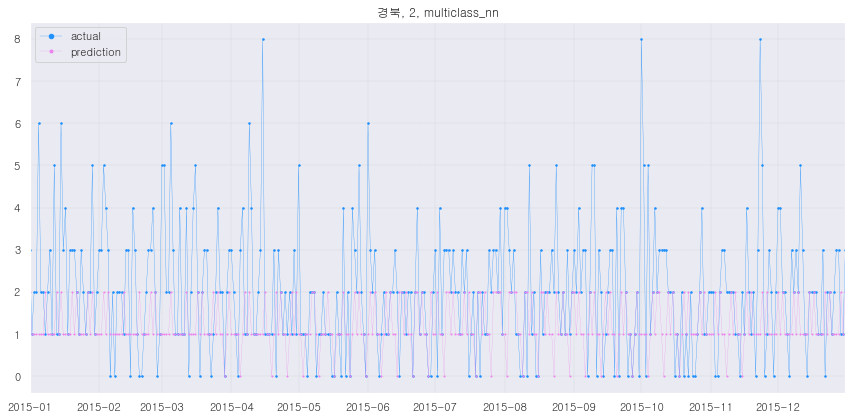

1.729676507881693


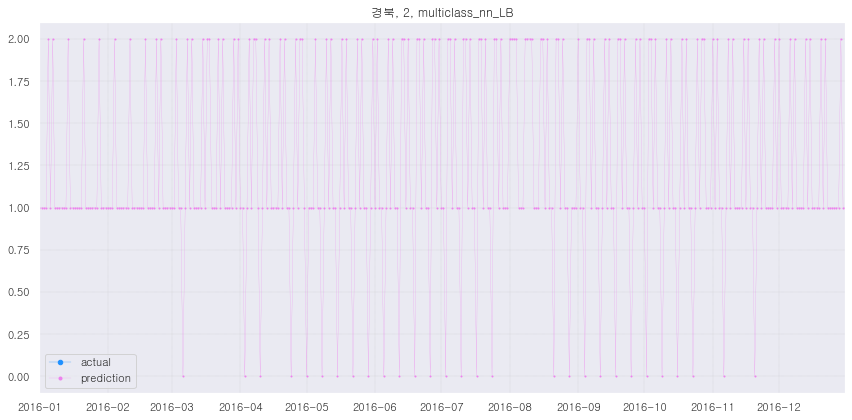

In [70]:
now = datetime.datetime.now()
nowDatetime = now.strftime('%m%d_%H%M')

result = pd.DataFrame(columns=['sido', 'sex', 'rmse'])
LB_result = pd.DataFrame(columns=['yyyymmdd', 'sido', 'sex', 'frequency'])


# sido = '서울'
# sex = 1
for sido in add_list: # ('광주','서울'):
    for sex in (1,2):
                #-------------------------------------------------------------------------------------------#
                print("============================", sido, sex, "============================")
                condition = (full_raw_df['add']==sido) & (full_raw_df['sex']==sex)        
                tmp = full_raw_df.copy()[condition]
                tmp.reset_index(level=0, inplace=True, drop=True)

                # one-hot encoding
                Y = tmp['frequency']
                le = preprocessing.LabelEncoder()
                le.fit(Y)
                Y = le.transform(Y)
                Y_encoded = tf.keras.utils.to_categorical(Y)

                # scaling
                scaler_x = StandardScaler()
                scaled_df = scaler_x.fit_transform(tmp[indep_cols])
                scaled_df = pd.DataFrame(scaled_df, columns=indep_cols)

                # train, test 분리
                x_train = scaled_df[0:-731]
                y_train = Y_encoded[0:-731]

                x_valid = scaled_df[-731:-366]
                y_valid = Y_encoded[-731:-366]

                x_test = scaled_df[-366:]


                # model 생성
                model_nm = "multiclass_nn"
                model = make_multiclass_nn(x_train, y_train)
                record_model_setting(make_multiclass_nn)

                # 모델 컴파일
                model.compile(loss='categorical_crossentropy',#
                        optimizer='rmsprop',
                        metrics=[root_mean_squared_error])

                # 모델 학습
                early_stop = EarlyStopping(monitor='val_loss', patience=3)
                history = model.fit(x_train, y_train,
                        validation_data=(x_valid, y_valid),
                        epochs=10, batch_size=128,
                        verbose=1,
                        callbacks=[early_stop])

                model.save('e:/kma/model/{0}_{1}_{2}_{3}.h5'.format(model_nm, sido, sex, nowDatetime))

                print("\n Accuracy: %.4f" % (model.evaluate(scaled_df, Y_encoded)[1]))

                # 예측
                pred_valid = np.argmax(model.predict(x_valid), axis=1)

                # 그래프 확인
                graph(tmp.frequency[-731:-366], pred_valid, model_nm)

                # rmse
                rmse = mean_squared_error(tmp.frequency[-731:-366], pred_valid, squared=False)
                print(rmse)
                result_tmp = pd.DataFrame([[sido, sex, rmse]], columns=['sido', 'sex', 'rmse'])
                result = pd.concat([result, result_tmp])



                # 2016 test---------------------------------------------
                pred_test = np.argmax(model.predict(x_test), axis=1)
                graph(tmp.frequency[-366:], pred_test, model_nm+'_LB', 'test')

                LB_result_tmp = pd.DataFrame({'yyyymmdd':tmp[-366:].yyyymmdd, 'sido':sido, 'sex':sex, 'frequency':pred_test})
                LB_result = pd.concat([LB_result, LB_result_tmp])
                #-------------------------------------------------------
                        
                        
                #-------------------------------------------------------------------------------------------#
# 
# rmse 결과 저장
result.to_csv('e:/kma/rmse/{0}_{1}.csv'.format(model_nm, nowDatetime), encoding = 'utf-8-sig')


# 2016 test셋 예측 결과 저장
LB_result.to_csv('e:/kma/data/leaderboard/{0}_{1}.csv'.format(model_nm, nowDatetime), encoding = 'utf-8-sig')

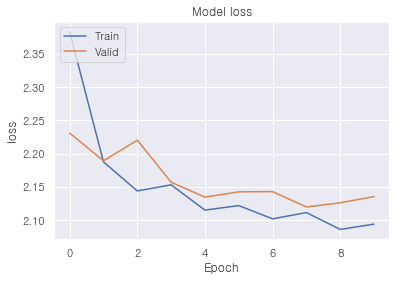

In [66]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


In [ ]:

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 리더보드 제출

In [ ]:
# 리더보드 제출용

# 검증데이터 불러오기
raw_df = pd.read_csv('e:/kma/data/TEST_tree_with_파생변수_euc-kr0725.csv', encoding='cp949')
raw_df.drop(['Unnamed: 0', 'frequency'], axis=1, inplace=True)
raw_df = raw_df.astype({'yyyymmdd':'str'})
raw_df['yyyymmdd'] = pd.to_datetime(raw_df['yyyymmdd'])
# raw_df = pd.get_dummies(raw_df, columns=['weekday', 'season'])

# indep_cols = raw_df.columns.difference(['yyyymmdd', 'add', 'sex', 'frequency'])

# 검증데이터셋 area 순서
area_list = ('경기', '강원', '인천', '충북', '서울', '광주', '경북', '대구', '충남', '세종', '전남', '경남', '전북', '대전', '울산', '부산', '제주')

In [ ]:
raw_df.columns

In [ ]:
indep_cols

In [ ]:
ymdlist = raw_df.yyyymmdd
ymdlist[ymdlist]

In [ ]:
# nowDatetime = '0725_0155'
result = pd.DataFrame(columns=['yyyymmdd', 'sido', 'sex', 'frequency'])

# sido = '서울'
for sido in area_list: # ('광주','서울'):
# sex = 1
    for sex in (1,2):
#-------------------------------------------------------------------------------------------#
        print("============================", sido, sex, "============================")
        condition = (raw_df['add']==sido) & (raw_df['sex']==sex)        
        tmp = raw_df.copy()[condition]
        # print(tmp.head(2))

        # scaling
        scaler_x = StandardScaler()
        scaled_df = scaler_x.fit_transform(tmp[indep_cols])
        scaled_df = pd.DataFrame(scaled_df, columns=indep_cols)

        # model 불러오기
        model_nm = 'multiclass_nn'
        model = load_model('e:/kma/model/{0}_{1}_{2}_{3}.h5'.format(model_nm, sido, sex, nowDatetime))

        # 예측
        pred = np.argmax(model.predict(scaled_df), axis=1)

        # 그래프 확인
        graph(pred, pred, model_nm+'_LB')

        #-------------------------------------------------------------------------------------------#
        result_tmp = pd.DataFrame({'yyyymmdd':tmp.yyyymmdd, 'sido':sido, 'sex':sex, 'frequency':pred})
        result = result.append(result_tmp)
#-------------------------------------------------------------------------------------------#
# 
# 예측 결과 저장
result.to_csv('e:/kma/data/leaderboard/{0}_{1}.csv'.format(model_nm, nowDatetime), encoding = 'utf-8-sig')

In [ ]:
multiclass = pd.read_csv('e:/kma/data/leaderboard/220194.csv')
multiclass.isnull().sum()

In [ ]:
multiclass = pd.read_csv('e:/kma/data/leaderboard/multiclass_nn_0727_0035.csv')
multiclass

In [ ]:
# sido = '서울'
# sex = 1

for sido in area_list:
    for sex in (1, 2):
        condition = (multiclass['sido']==sido)&(multiclass['sex']==1)&(multiclass['yyyymmdd']=='2016-02-28')
        mc_tmp = multiclass.copy()[condition]
        mc_tmp['yyyymmdd']='2016-02-29'

        multiclass = pd.concat([multiclass, mc_tmp])

In [ ]:
multiclass.shape

In [ ]:
multiclass.reset_index(level=0, inplace=True)

In [ ]:
multiclass.to_csv('e:/kma/data/leaderboard/{0}_{1}_0229.csv'.format(model_nm, nowDatetime), encoding = 'utf-8-sig')

In [ ]:
# 시계열 확인
from statsmodels.tsa.seasonal import seasonal_decompose
condition = (raw_df['add']=='서울') & (raw_df['sex']==1)        
tmp = raw_df.copy()[condition]
tmp=tmp[14:]
ts = tmp.frequency
result = seasonal_decompose(ts, model='additive', period=365)

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()